In [7]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [8]:
import sys
import operator
sys.path.append('/content/drive/My Drive/Colab Notebooks/Week4Labs/')
from utils import *

from sussex_nltk.corpus_readers import AmazonReviewCorpusReader

Sussex NLTK root directory is /content/drive/My Drive/Colab Notebooks/resources


# INTRODUCTION


---


This report tests the complexity and efficiency of different similarity methods using different document representations

I took a sample of long poetry sentences, and another sample from the amazon corpus reader of sentences with at least 50 words and added them all to a list 'sentences'.

In [9]:
genSentences=[]

s='The French are certainly misunderstood: — but whether the fault is theirs, in not sufficiently explaining themselves, or speaking with that exact limitation and precision which one would expect on a point of such importance, and which, moreover, is so likely to be contested by us — or whether the fault may not be altogether on our side, in not understanding their language always so critically as to know “what they would be at” — I shall not decide; but ‘tis evident to me, when they affirm, “That they who have seen Paris, have seen every thing,” they must mean to speak of those who have seen it by day-light'
genSentences.append(s)

#50 words
s='During the summer, Tom Howe, a teacher at Monona Grove High School, and I offer two courses to high school teachers, especially those involved with Advanced Placement U.S. History. In the practicum, I suggest using the 50-word sentence in their classes and, in an example of active learning, ask them to write such a sentence. In 2007, one teacher presented his own sentence and then indicated that he had written a second sentence as a reflection on the process. I do not collect the sentences during the practicum, so I made no comments, but I include the initial exercise and the reflection it inspired because the latter voices the kinds of sentiments students in my undergraduate classes often express when I query them about the experience. The fact that this teacher offered his reflection voluntarily and cast it in the 50-word format speak for themselves'
genSentences.append(s)

s='My very photogenic mother died in a freak accident (picnic, lightning) when I was three, and, save for a pocket of warmth in the darkest past, nothing of her subsists within the hollows and dells of memory, over which, if you can still stand my style (I am writing under observation), the sun of my infancy had set: surely, you all know those redolent remnants of day suspended, with the midges, about some hedge in bloom or suddenly entered and traversed by the rambler, at the bottom of a hill, in the summer dusk; a furry warmth, golden midges'
genSentences.append(s)

#96 words
s='As he crossed toward the pharmacy at the corner he involuntarily turned his head because of a burst of light that had ricocheted from his temple, and saw, with that quick smile with which we greet a rainbow or a rose, a blindingly white parallelogram of sky being unloaded from the van—a dresser with mirrors across which, as across a cinema screen, passed a flawlessly clear reflection of boughs sliding and swaying not arboreally, but with a human vacillation, produced by the nature of those who were carrying this sky, these boughs, this gliding façade'
genSentences.append(s)

#107 words
s='In the loveliest town of all, where the houses were white and high and the elms trees were green and higher than the houses, where the front yards were wide and pleasant and the back yards were bushy and worth finding out about, where the streets sloped down to the stream and the stream flowed quietly under the bridge, where the lawns ended in orchards and the orchards ended in fields and the fields ended in pastures and the pastures climbed the hill and disappeared over the top toward the wonderful wide sky, in this loveliest of all towns Stuart stopped to get a drink of sarsaparilla'
genSentences.append(s)

s='All I know is that I stood spellbound in his high-ceilinged studio room, with its north-facing windows in front of the heavy mahogany bureau at which Michael said he no longer worked because the room was so cold, even in midsummer; and that, while we talked of the difficulty of heating old houses, a strange feeling came upon me, as if it were not he who had abandoned that place of work but I, as if the spectacles cases, letters and writing materials that had evidently lain untouched for months in the soft north light had once been my spectacle cases, my letters and my writing materials'
genSentences.append(s)

s='But it was the figure you cut as an employee, on an employee’s footing with the girls, in work clothes, and being of that tin-tough, creaking, jazzy bazaar of hardware, glassware, chocolate, chicken-feed, jewelry, drygoods, oilcloth, and song hits—that was the big thing; and even being the Atlases of it, under the floor, hearing how the floor bore up under the ambling weight of hundreds, with the fanning, breathing movie organ next door and the rumble descending from the trolleys on Chicago Avenue—the bloody-rinded Saturday gloom of wind-borne ash, and blackened forms of five-storey buildings rising up to a blind Northern dimness from the Christmas blaze of shops'
genSentences.append(s)

s='She’s too young, it’s too late, we come apart, my arms are held, and the edges go dark and nothing is left but a little window, a very little window, like the wrong end of a telescope, like the window on a Christmas card, an old one, night and ice outside, and within a candle, a shining tree, a family, I can hear the bells even, sleigh bells, from the radio, old music, but through this window I can see, small but very clear, I can see her, going away from me, through the trees which are already turning, red and yellow, holding out her arms to me, being carried away'
genSentences.append(s)

#135 words
s='The houses over to Central Park West went first, they got darker as if dissolving into the dark sky until I couldn’t make them out, and then the trees began to lose their shape, and finally, this was toward the end of the season, maybe it was late February of that very cold winter, and all I could see were these phantom shapes of the white ice, that last light, went gray and then altogether black, and then all my sight was gone though I could hear clearly the scoot scut of the blades on ice, a very satisfying sound, a soft sound though full of intention, a deeper tone that you’d expect made by the skate blades, perhaps for having sounded the resonant basso of the water under the ice, scoot scut, scoot scut'
genSentences.append(s)

#150 words
s='The Francmason weighed anchor, swung about, and steamed into the ochre hills, through the straits and out into the open sea while Corker recounted the heroic legends of Fleet Street; he told of the classic scoops and hoaxes; of the confessions wrung from hysterical suspects; of the innuendo and intricate misrepresentations, the luscious, detailed inventions that composed contemporary history; of the positive, daring lies that got a chap a rise of screw; how Wenlock Jakes, highest paid journalist of the United States, scooped the world with an eye-witness story of the sinking of the Lusitania four hours before she was hit; how [Sir Jocelyn] Hitchcock, the English Jakes, straddling over his desk in London, had chronicled day by day the horrors of the Messina earthquake; how Corker himself, not three months back, had had the good fortune to encounter a knight’s widow trapped by the foot between lift and landing'
genSentences.append(s)

#200 words
s='About this time, when some rain began to fall, Sancho proposed that they should shelter themselves in the fulling-mill, but Don Quixote had conceived such abhorrence for it, on account of what was past, that he would no means set foot within its wall; wherefore, turning to the right-hand, they chanced to fall in with a road different from that in which they had traveled the day before; they had not gone far, when the knight discovered a man riding with something on his head, that glittered like polished gold, and scarce had he descried this phenomenon, when turning to Sancho, “I find,” said he, “that every proverb is strictly true; indeed, all of them are apophthegms dictated by experience herself; more especially, that which says, “shut one door, and another will soon open”: this I mention, because, if last night, fortune shut against us the door we fought to enter, by deceiving us with the fulling-hammers; today another stands wide open, in proffering to use us, another greater and more certain adventure, by which, if I fail to enter, it shall be my own fault, and not imputed to my ignorance of fulling-mills, or the darkness of the night'
genSentences.append(s)

#251 words
s='To none of these interrogatories, whereof every one was more pathetically delivered than the last, did Mrs Varden answer one word: but Miggs, not at all abashed by this circumstance, turned to the small boy in attendance—her eldest nephew—son of her own married sister—born in Golden Lion Court, number twenty-sivin, and bred in the very shadow of the second bell-handle on the right- hand door-post—and with a plentiful use of her pocket- handkerchief, addressed herself to him: requesting that on his return home he would console his parents for the loss of her, his aunt, by delivering to them a faithful statement of his having left her in the bosom of that family, with which, as his aforesaid parents well knew, her best affections were incorporated; that he would remind them that nothing less than her imperious sense of duty, and devoted attachment to her old master and missis, likewise Miss Dolly and young Mr Joe, should ever have induced her to decline that pressing invitation which they, his parents, had, as he could testify, given her, to lodge and board with them, free of all cost and charge, for evermore; lastly, that he would help her with her box upstairs, and then repair straight home, bearing her blessing and her strong injunctions to mingle in his prayers a supplication that he might in course of time grow up a locksmith, or a Mr Joe, and have Mrs Vardens and Miss Dollys for his relations and friends'
genSentences.append(s)

#309 words
s='He walked on toward the shop, but what he had just seen—whether because it had given him a kindred pleasure, or because it had taken him unawares and jolted him (as children in the hayloft fall into the resilient darkness)—released in him that pleasant something which for several days now had been at the murky bottom of his every thought, taking possession of him at the slightest provocation: my collection of poems has been published; and when as now, his mind tumbled like this, that is, when he recalled the fifty-odd poems that had just come out, he would skim in an instant the entire book, so that in an instantaneous mist of its madly accelerated music one could not make any readable sense of the flicking lines—the familiar words would rush past, swirling amid violent foam (whose seething was transformed into a mighty flowing motion if one fixed one’s eyes on it, as we used to do long ago, looking down at it from a vibrating mill bridge until the bridge turned into a ship’s stern: farewell!)—and this foam, and this flickering, and a separate verse that rushed past all alone, shouting in wild ecstasy from afar, probably calling him home, all of this, together with the creamy white of the cover, was merged in a blissful feeling of exceptional purity … What am I doing! he thought, abruptly coming to his senses and realizing that the first thing he had done upon entering the next shop was to dump the change he had received at the tobacconist’s onto the rubber islet in the middle of the glass counter, through which he glimpsed the submerged treasure of flasked perfumes, while the salesgirl’s gaze, condescending toward his odd behavior, followed with curiosity this absentminded hand paying for a purchase that had not yet been named'
genSentences.append(s)

#426 words
s='All these things and, still more than these, the treasures which had come to the church from personages who to me were almost legendary figures (such as the golden cross wrought, it was said, by Saint Eloi and presented by Dagobert, and the tomb of the sons of Louis the Germanic in porphyry and enamelled copper), because of which I used to go forward into the church when we were making our way to our chairs as into a fairy-haunted valley, where the rustic sees with amazement on a rock, a tree, a marsh, the tangible proofs of the little people’s supernatural passage — all these things made of the church for me something entirely different from the rest of the town; a building which occupied, so to speak, four dimensions of space — the name of the fourth being Time — which had sailed the centuries with that old nave, where bay after bay, chapel after chapel, seemed to stretch across and hold down and conquer not merely a few yards of soil, but each successive epoch from which the whole building had emerged triumphant, hiding the rugged barbarities of the eleventh century in the thickness of its walls, through which nothing could be seen of the heavy arches, long stopped and blinded with coarse blocks of ashlar, except where, near the porch, a deep groove was furrowed into one wall by the tower-stair; and even there the barbarity was veiled by the graceful gothic arcade which pressed coquettishly upon it, like a row of grown-up sisters who, to hide him from the eyes of strangers, arrange themselves smilingly in front of a countrified, unmannerly and ill-dressed younger brother; rearing into the sky above the Square a tower which had looked down upon Saint Louis, and seemed to behold him still; and thrusting down with its crypt into the blackness of a Merovingian night, through which, guiding us with groping finger-tips beneath the shadowy vault, ribbed strongly as an immense bat’s wing of stone, Théodore or his sister would light up for us with a candle the tomb of Sigebert’s little daughter, in which a deep hole, like the bed of a fossil, had been bored, or so it was said, “by a crystal lamp which, on the night when the Frankish princess was murdered, had left, of its own accord, the golden chains by which it was suspended where the apse is to-day and with neither the crystal broken nor the light extinguished had buried itself in the stone, through which it had gently forced its way'
genSentences.append(s)

#1147 words
s='Bottom of the ninth, two out, game tied, runners at the corners, the count full on McCluskey, the fans on their feet, this place is going wild, outfield shaded in to guard against the blooper, pitcher looks in, shakes off the sign, a big lead off first, they’re not holding him on, only run that matters is the man dancing off third, shakes off another sign, McCluskey asking for time, steps out of the box, tugs up his batter’s glove, knocks dirt from his spikes, it’s a cat ‘n’ mouse game, break up his rhythm, make him wait, now the big guy’s back in the box, down in his crouch, the tall lefty toes the rubber, looks in, gives the nod, will he go with the breaking ball, maybe thinking slider, third baseman back a step, catcher sets up inside, pitcher taking his time, very deliberate out there, now he’s ready, the set, the kick, he deals, it’s a fastball, straight down the pipe, McCluskey swings, a tremendous rip, he crushes it, the crowd is screaming, the centerfielder back, back, angling toward right, tons of room out there in no man’s land, still going back, he’s at the track, that ball is going, going, he’s at the wall, looking up, that ball is gone, see ya, hasta la vista baby, McCluskey goes yard, over the three-hundred-ninety-foot mark in right center, game over, he creamed it, that baby is gone and she ain’t comin back anytime soon, sayonara, the crowd yelling, the ball still carrying, the stands going crazy, McCluskey rounding second, the ball still up there, way up there, high over the right-centerfield bleachers, headed for the upper deck, talk about a tape-measure shot, another M-bomb from the Big M, been doing it all year, he’s rounding third, ball still going, still going, that ball was smoked, a no doubter, wait a minute wait a minute oh oh oh it’s outta here, that ball is out of the park, cleared the upper deck, up over the Budweiser sign, Jimmy can you get me figures on that, he hammered it clean outta here, got all of it, can you believe it, an out of the parker, hot diggity, slammed it a country mile, the big guy’s crossing the plate, team’s all over him, the crowd roaring, what’s that Jimmy, Jimmy are you sure, I’m being told it’s a first, that’s right a first, no one’s ever socked one out before, the Clusker really got around on it, looking fastball all the way, got the sweet part of the bat on it, launched a rocket, oh baby did he scald it, I mean he drilled it, the big guy is strong but it’s that smooth swing of his, the King of Swing, puts his whole body into it, hits with his legs, he smashed it, a Cooperstown clout, right on the screws, the ball still going, unbelievable, up past the Goodyear Blimp, see ya later alligator, up into the wild blue yonder, still going, ain’t nothing gonna stop that baby, they’re walking McCluskey back to the dugout, fans swarming all over the field, they’re pointing up at the sky, the ball still traveling, up real high, that ball is wayway outta here, Jimmy what have you got, going, going, hold on, what’s that Jimmy, I’m told the ball has gone all the way through the troposphere, is that a fact, now how about that, the big guy hit it a ton, really skyed it, up there now in the stratosphere, good golly Miss Molly, help me out here Jimmy, stratosphere starts at six miles and goes up 170,000 feet, man did he ever jack it outta here, a dinger from McSwinger, a whopper from the Big Bopper, going, going, the stands emptying out, the ball up in the mesosphere, the big guy blistered it, he powdered it, the ground crew picking up bottles and paper cups and peanut shells and hot dog wrappers, power-washing the seats, you can bet people’ll be talking about this one for a long time to come, he plastered that ball, a pitch right down Broadway, tried to paint the inside corner but missed his spot, you don’t want to let the big guy extend those arms, up now in the exosphere, way up there, never seen anything like it, the ball carrying well all day but who would’ve thought, wait a minute, hold on a second, holy cow it’s left the earth’s atmosphere, so long it’s been good ta know ya, up there now in outer space, I mean that ball is outta here, bye bye birdie, still going, down here at the park the stands are empty, sun gone down, moon’s up, nearly full, it’s a beautiful night, temperature seventy-three, another day game tomorrow then out to the West coast for a tough three-game series, the ball still going, looks like she’s headed for the moon, talk about a moon shot, man did he ever paste it outta here, higher, deeper, going, going, it’s gone past the moon, you can kiss that baby goodbye, goodnight Irene I’ll see you in my dreams, the big guy got good wood on it, right on the money, swinging for the downs, the ball still traveling, sailing past Mars, up through the asteroid belt, you gotta love it, past Jupiter, see ya Saturn, so long Uranus, arrivederci Neptune, up there now in the Milky Way, a round-tripper to the Big Dipper, a galaxy shot, a black-hole blast, how many stars are we talking about Jimmy, Jimmy says two hundred billion, that’s two hundred billion stars in the Milky Way, a nickel for every star and you can stop worrying about your 401K, the ball still traveling, out past the Milky Way and headed on into intergalactic space, hooo did he ever whack it, he shellacked it, a good season but came up short in the playoffs, McCluskey’ll be back next year, the ball out past the Andromeda galaxy, going, going, the big guy mashed it, he clob-bobbered it, wham-bam-a-rammed it, he’s looking good in spring training, back with that sweet swing, out past the Virgo supercluster with its thousands of galaxies, that ball was spanked, a Big Bang for the record book, a four-bagger with swagger, out past the Hydra-Centaurus supercluster, still going, out past the Aquarius supercluster, thousands and millions of superclusters out there, McCluskey still remembers it, he’s coaching down in Triple A, the big man a sensation in his day, the ball still out there, still climbing, sailing out toward the edge of the observable universe, the edge receding faster than the speed of light, the ball still going, still going, he remembers the feel of the wood in his hands, the good sound of it as he swung, smell of pine tar, bottom of the ninth, two on, two out, a summer day'
genSentences.append(s)

#1185 words
s='Part of what kept him standing in the restive group of men waiting authorization to enter the airport was a kind of paralysis that resulted from Sylvanshine’s reflecting on the logistics of getting to the Peoria 047 REC – the issue of whether the REC sent a van for transfers or whether Sylvanshine would have to take a cab from the little airport had not been conclusively resolved – and then how to arrive and check in and where to store his three bags while he checked in and filled out his arrival and Post-code payroll and withholding forms and orientational materials then somehow get directions and proceed to the apartment that Systems had rented for him at government rates and get there in time to find someplace to eat that was either in walking distance or would require getting another cab – except the telephone in the alleged apartment wasn’t connected yet and he considered the prospects of being able to hail a cab from outside an apartment window complex were at best iffy, and if he told the original cab he’d taken to the apartment to wait for him, there would be difficulties because how exactly would he reassure the cabbie that he really was coming right back out after dropping his bags and doing a quick spot check of the apartment’s condition and suitability instead of it being a ruse designed to defraud the driver of his fare, Sylvanshine ducking out the back of the Angler’s Cove apartment complex or even conceivably barricading himself in the apartment and not responding to the driver’s knock, or his ring if the apartment had a doorbell, which his and Reynold’s current apartment in Martinsburg most assuredly did not, or the driver’s queries/threats through the apartment door, a scam that resided in Claude Sylvanshine’s awareness only because a number of independent Philadelphia commercial carriage operators had proposed heavy Schedule C losses under the provisio “Losses Through Theft of Service” and detailed this type of scam as prevalent on the poorly typed or sometimes even handwritten attachments required to explain unusual or specific C-deductions like this, whereas were Sylvanshine to pay the fare and tip and perhaps even a certain amount in advance on account so as to help assure the driver of his honorable intentions re the second leg of the sojourn there was no tangible guarantee that the average taxi driver – a cynical and ethically marginal species, hustlers, as even their sumdged returns’ very low tip-income-vs-number-of-fares-in-an-average-shift ratios in Philly had indicated – wouldn’t simply speed away with Sylvanshine’s money, creating enormous hassles in terms of filling out the internal forms for getting a percentage of his travel per diem reimbursed and also leaving Sylvanshine alone, famished (he was unable to eat before travel), phoneless, devoid of Reynold’s counsel and logistical savvy in the sterile new unfurnished apartment, his stomach roiling in on itself in such a way that it would be all Sylvanshine could to unpack in any kind of half-organized fashion and get to sleep on the nylon travel pallet on the unfinished floor in the possible presence of exotic Midwestern bugs, to say nothing of putting in the hour of CPA exam review he’d promised himself this morning when he’d overslept slightly and then encountered last-minute packing problems that had canceled out the firmly scheduled hour of morning CPA review before one of the unmarked Systems vans arrived to take him and his bags out through Harpers Ferry and Ball’s Bluff to the airport, to say even less about any kind of systematic organization and mastery of the voluminous Post, Duty, Personnel, and Systems Protocols materials he should be receiving promptly after check-in and forms processing at the Post, which any reasonable Personnel Director would expect a new examiner to have thoroughly internalized before reporting for the first actual day interacting with REC examiners, and which there was no way in any real world that Sylanshine could expect himself to try to review and internalize on either a sixteen-hour fast or a night on the pallet with his damp raincoat as a pillow – he had been unable to pack the special contoured orthotic pillow for his neck’s chronic pinched or inflamed nerve; it would have required its own suitcase and thereby exceeded the baggage limit and incurred an exorbitant surcharge which Reynolds refused to let Sylvanshine pay out of same principle – with the additional problem of securing any sort of substantive breakfast or return ride to the REC in the morning without a phone, or how without a phone one was supposed to even try to verify whether and when the apartment phone was going to be activated, plus of course the ominous probability of oversleeping the next morning due to both travel fatigue and his not having packed his traveler’s alarm clock – or at any rate not having been certain that he’d packed in instead of allowing it to go into one of the three large cartons that he had packed and labeled but done a hasty, slipshod job of writing out Contents Lists for the boxes to refer to when unpacking them in Peoria, and which Reynolds had pledged to insert into the Service’s Support Branch shipping mechanism at roughly the same time Sylvanshine’s flight was scheduled to depart from Dulles, which meant two or possibly even three days before the cartons with all the essentials Sylvanshine had not been able to fit into his bags arrived, and even then they would arrive at the REC and it was as yet unclear how Claude would then them home to the apartment – the realization about the traveler’s alarm having been the chief cause of Sylvanshine’s having to unlock and open all the carefully packed luggage that morning on arising already half an hour late, to try to locate or verify the inclusion of the portable alarm, which he had failed to do – the whole thing presenting such a cyclone of logistical problems and complexities that Sylvanshine was forced to some some Thought Stopping right there on the wet tarmac surrounded by restive breathers, turning 360-degrees several times and trying to merge his own awareness with the panoramic vista, which except for airport-related items was uniformly featureless and old-coin gray and so remarkably flat that it was as if the earth here had been stamped on with some cosmic boot, visibility in all directions limited only by the horizon, which was the same general color and texture as the sky and created the specular impression of being in the center of some huge and stagnant body of water, an oceanic impression so literally obliterating that Sylvanshine was cast or propelled back in on himself and felt again the edge of the shadow of the wing of Total Terror and Disqualification pass over him, the knowledge of his being surely and direly ill-suited for whatever lay ahead, and of its being only a matter of time before this fact emerged and was made manifest to all those present in the moment that Sylvanshine finally, and forever, lost it'
genSentences.append(s)

#1289 words
s='Just exactly like Father if Father had known as much about it the night before I went out there as he did the day after I came back thinking Mad impotent old man who realised at last that there must be some limit even to the capabilities of a demon for doing harm, who must have seen his situation as that of the show girl, the pony, who realises that the principal tune she prances to comes not from horn and fiddle and drum but from a clock and calendar, must have seen himself as the old wornout cannon which realises that it can deliver just one more fierce shot and crumble to dust in its own furious blast and recoil, who looked about upon the scene which was still within his scope and compass and saw son gone, vanished, more insuperable to him now than if the son were dead since now (if the son still lived) his name would be different and those to call him by it strangers and whatever dragon’s outcropping of Sutpen blood the son might sow on the body of whatever strange woman would therefore carry on the tradition, accomplish the hereditary evil and harm under another name and upon and among people who will never have heard the right one; daughter doomed to spinsterhood who had chosen spinsterhood already before there was anyone named Charles Bon since the aunt who came to succor her in bereavement and sorrow found neither but instead that calm absolutely impenetrable face between a homespun dress and sunbonnet seen before a closed door and again in a cloudy swirl of chickens while Jones was building the coffin and which she wore during the next year while the aunt lived there and the three women wove their own garments and raised their own food and cut the wood they cooked it with (excusing what help they had from Jones who lived with his granddaughter in the abandoned fishing camp with its collapsing roof and rotting porch against which the rusty scythe which Sutpen was to lend him, make him borrow to cut away the weeds from the door-and at last forced him to use though not to cut weeds, at least not vegetable weeds -would lean for two years) and wore still after the aunt’s indignation had swept her back to town to live on stolen garden truck and out o f anonymous baskets left on her front steps at night, the three of them, the two daughters negro and white and the aunt twelve miles away watching from her distance as the two daughters watched from theirs the old demon, the ancient varicose and despairing Faustus fling his final main now with the Creditor’s hand already on his shoulder, running his little country store now for his bread and meat, haggling tediously over nickels and dimes with rapacious and poverty-stricken whites and negroes, who at one time could have galloped for ten miles in any direction without crossing his own boundary, using out of his meagre stock the cheap ribbons and beads and the stale violently-colored candy with which even an old man can seduce a fifteen-year-old country girl, to ruin the granddaughter o f his partner, this Jones-this gangling malaria-ridden white man whom he had given permission fourteen years ago to squat in the abandoned fishing camp with the year-old grandchild-Jones, partner porter and clerk who at the demon’s command removed with his own hand (and maybe delivered too) from the showcase the candy beads and ribbons, measured the very cloth from which Judith (who had not been bereaved and did not mourn) helped the granddaughter to fashion a dress to walk past the lounging men in, the side-looking and the tongues, until her increasing belly taught her embarrassment-or perhaps fear;-Jones who before ’61 had not even been allowed to approach the front of the house and who during the next four years got no nearer than the kitchen door and that only when he brought the game and fish and vegetables on which the seducer-to-be’s wife and daughter (and Clytie too, the one remaining servant, negro, the one who would forbid him to pass the kitchen door with what he brought) depended on to keep life in them, but who now entered the house itself on the (quite frequent now) afternoons when the demon would suddenly curse the store empty of customers and lock the door and repair to the rear and in the same tone in which he used to address his orderly or even his house servants when he had them (and in which he doubtless ordered Jones to fetch from the showcase the ribbons and beads and candy) direct Jones to fetch the jug, the two of them (and Jones even sitting now who in the old days, the old dead Sunday afternoons of monotonous peace which they spent beneath the scuppernong arbor in the back yard, the demon lying in the hammock while Jones squatted against a post, rising from time to time to pour for the demon from the demijohn and the bucket of spring water which he had fetched from the spring more than a mile away then squatting again, chortling and chuckling and saying `Sho, Mister Tawm’ each time the demon paused)-the two of them drinking turn and turn about from the jug and the demon not lying down now nor even sitting but reaching after the third or second drink that old man’s state of impotent and furious undefeat in which he would rise, swaying and plunging and shouting for his horse and pistols to ride single-handed into Washington and shoot Lincoln (a year or so too late here) and Sherman both, shouting, ‘Kill them! Shoot them down like the dogs they are!’ and Jones: ‘Sho, Kernel; sho now’ and catching him as he fell and commandeering the first passing wagon to take him to the house and carry him up the front steps and through the paintless formal door beneath its fanlight imported pane by pane from Europe which Judith held open for him to enter with no change, no alteration in that calm frozen face which she had worn for four years now, and on up the stairs and into the bedroom and put him to bed like a baby and then lie down himself on the floor beside the bed though not to sleep since before dawn the man on the bed would stir and groan and Jones would say, ‘flyer I am, Kernel. Hit’s all right. They aint whupped us yit, air they?’ this Jones who after the demon rode away with the regiment when the granddaughter was only eight years old would tell people that he ‘was lookin after Major’s place and niggers’ even before they had time to ask him why he was not with the troops and perhaps in time came to believe the lie himself, who was among the first to greet the demon when he returned, to meet him at the gate and say, ‘Well, Kernel, they kilt us but they aint whupped us yit, air they?’ who even worked, labored, sweat at the demon’s behest during that first furious period while the demon believed he could restore by sheer indomitable willing the Sutpen’s Hundred which he remembered and had lost, labored with no hope of pay or reward who must have seen long before the demon did (or would admit it) that the task was hopeless-blind Jones who apparently saw still in that furious lecherous wreck the old fine figure of the man who once galloped on the black thoroughbred about that domain two boundaries of which the eye could not see from any point'
genSentences.append(s)

#1672 words
s='The place, I’ll make it all the same, I’ll make it in my head, I’ll draw it out of my memory, I’ll gather it all about me, I’ll make myself a head, I’ll make myself a memory, I have only to listen, the voice will tell me everything, tell it to me again, everything I need, in dribs and drabs, breathless, it’s like a confession, a last confession, you think it’s finished, then it starts off again, there were so many sins, the memory is so bad, the words don’t come, the words fail, the breath fails, no, it’s something else, it’s an indictment, a dying voice accusing, accusing me, you must accuse someone, a culprit is indispensable, it speaks of my sins, it speaks of my head, it says it’s mine, it says that I repent, that I want to be punished, better than I am, that I want to go, give myself up, a victim is essential, I have only to listen, it will show me my hiding-place, what it’s like, where the door is, if there’s a door, and whereabouts I am in it, and what lies between us, how the land lies, what kind of country, whether it’s sea, or whether it’s mountain, and the way to take, so that I may go, make my escape, give myself up, come to the place where the axe falls, without further ceremony, on all who come from here, I’m not the first, I won’t be the first, it will best me in the end, it has bested better than me, it will tell me what to do, in order to rise, move, act like a body endowed with despair, that’s how I reason, that’s how I hear myself reasoning, all lies, it’s not me they’re calling, not me they’re talking about, it’s not yet my turn, it’s someone else’s turn, that’s why I can’t stir, that’s why I don’t feel a body on me, I’m not suffering enough yet, it’s not yet my turn, not suffering enough to be able to stir, to have a body, complete with head, to be able to understand, to have eyes to light the way, I merely hear, without understanding, without being able to profit by it, by what I hear, to do what, to rise and go and be done with hearing, I don’t hear everything, that must be it, the important things escape me, it’s not my turn, the topographical and anatomical information in particular is lost on me, no, I hear everything, what difference does it make, the moment it’s not my turn, my turn to understand, my turn to live, my turn of the lifescrew, it calls that living, the space of the way from here to the door, it’s all there, in what I hear, somewhere, if all has been said, all this long time, all must have been said, but it’s not my turn to know what, to know what I am, where I am, and what I should do to stop being it, to stop being there, that’s coherent, so as to be another, no, the same, I don’t know, depart into life, travel the road, find the door, find the axe, perhaps it’s a cord, for the neck, for the throat, for the cords, or fingers, I’ll have eyes, I’ll see fingers, it will be the silence, perhaps it’s a drop, find the door, open the door, drop, into the silence, it won’t be I, I’ll stay here, or there, more likely there, it will never be I, that’s all I know, it’s all been done already, said and said again, the departure, the body that rises, the way, in colour, the arrival, the door that opens, closes again, it was never I, I’ve never stirred, I’ve listened, I must have spoken, why deny it, why not admit it, after all, I deny nothing, I admit nothing, I say what I hear, I hear what I say, I don’t know, one or the other, or both, that makes three possibilities, pick your fancy, all these stories about travelers, these stories about paralytics, all are mine, I must be extremely old, or it’s memory playing tricks, if only I knew if I’ve lived, if I live, if I’ll live, that would simplify everything, impossible to find out, that’s where you’re buggered, I haven’t stirred, that’s all I know, no, I know something else, it’s not I, I always forget that, I resume, you must resume, never stirred from here, never stopped telling stories, to myself, hardly hearing them, hearing something else, listening for something else, wondering now and then where I got them from, was I in the land of the living, were they in mine, and where, where do I store them, in my head, I don’t feel a head on me, and what do I tell them with, with my mouth, same remark, and what do I hear them with, and so on, the old rigmarole, it can’t be I, or it’s because I pay no heed, it’s such an old habit, I do it without heeding, or as if I were somewhere else, there I am far again, there I am the absentee again, it’s his turn again now, he who neither speaks nor listens, who has neither body nor soul, it’s something else he has, he must have something, he must be somewhere, he is made of silence, there’s a pretty analysis, he’s in the silence, he’s the one to be sought, the one to be, the one to be spoken of, the one to speak, but he can’t speak, then I could stop, I’d be he, I’d be the silence, I’d be back in the silence, we’d be reunited, his story the story to be told, but he has no story, he hasn’t been in story, it’s not certain, he’s in his own story, unimaginable, unspeakable, that doesn’t matter, the attempt must be made, in the old stories incomprehensibly mine, to find his, it must be there somewhere, it must have been mine, before being his, I’ll recognize it, in the end I’ll recognize it, the story of the silence that he never left, that I should never have left, that I may never find again, that I may find again, then it will be he, it will be I, it will be the place, the silence, the end, the beginning, the beginning again, how can I say it, that’s all words, they’re all I have, and not many of them, the words fail, the voice fails, so be it, I know that well, it will be the silence, full of murmurs, distant cries, the usual silence, spent listening, spent waiting, waiting for the voice, the cries abate, like all cries, that is to say they stop, the murmurs cease, they give up, the voice begins again, it begins trying again, quick now before there is none left, no voice left, nothing left but the core of murmurs, distant cries, quick now and try again, with the words that remain, try what, I don’t know, I’ve forgotten, it doesn’t matter, I never knew, to have them carry me into my story, the words that remain, my old story, which I’ve forgotten, far from here, through the noise, through the door, into the silence, that must be it, it’s too late, perhaps it’s too late, perhaps they have, how would I know, in the silence you don’t know, perhaps it’s the door, perhaps I’m at the door, that would surprise me, perhaps it’s I, perhaps somewhere or other it was I, I can depart, all this time I’ve journeyed without knowing it, it’s I now at the door, what door, what’s a door doing here, it’s the last words, the true last, or it’s the murmurs, the murmurs are coming, I know that well, no, not even that, you talk of murmurs, distant cries, as long as you can talk, you talk of them before and you talk of them after, more lies, it will be the silence, the one that doesn’t last, spent listening, spent waiting, for it to be broken, for the voice to break it, perhaps there’s no other, I don’t know, it’s not worth having, that’s all I know, it’s not I, that’s all I know, it’s not mine, it’s the only one I ever had, that’s a lie, I must have had the other, the one that lasts, but it didn’t last, I don’t understand, that is to say it did, it still lasts, I’m still in it, I left myself behind in it, I’m waiting for me there, no, there you don’t wait, you don’t listen, I don’t know, perhaps it’s a dream, all a dream, that would surprise me, I’ll wake, in the silence, and never sleep again, it will be I, or dream, dream again, dream of a silence, a dream silence, full of murmurs, I don’t know, that’s all words, never wake, all words, there’s nothing else, you must go on, that’s all I know, they’re going to stop, I know that well, I can feel it, they’re going to abandon me, it will be the silence, for a moment, a good few moments, or it will be mine, the lasting one, that didn’t last, that still lasts, it will be I, you must go on, I can’t go on, you must go on, I’ll go on, you must say words, as long as there are any, until they find me, until they say me, strange pain, strange sin, you must go on, perhaps it’s done already, perhaps they have said me already, perhaps they have carried me to the threshold of my story, before the door that opens on my story, that would surprise me, if it opens, it will be I, it will be the silence, where I am, I don’t know, I’ll never know, in the silence you don’t know, you must go on, I can’t go on, I’ll go on'
genSentences.append(s)

#2569 words
s='Or a long sentence moving at a certain pace down the page aiming for the bottom-if not the bottom of this page then some other page-where it can rest, or stop for a moment to think out the questions raised by its own (temporary) existence, which ends when the page is turned, or the sentence falls out of the mind that holds it (temporarily) in some kind of embrace, not necessarily an ardent one, but more perhaps the kind of embrace enjoyed (or endured), by a wife who has just waked up and is on her way to the bathroom in the morning to wash her hair, and is bumped into by her husband, who has been lounging at the breakfast table reading the newspaper, and doesn’t see her coming out of the bedroom, but, when he bumps into her, or is bumped into by her, raises his hands to embrace her lightly, transiently, because he knows that if he gives her a real embrace so early in the morning, before she has properly shaken the dreams out of her head, and got her duds on, she won’t respond, and may even become slightly angry, and say something wounding, and so the husband invests in this embrace not so much physical or emotional pressure as he might, because he doesn’t want to waste anything-with this sort of feeling, then, the sentence passes through the mind more or less, and there is another way of describing the situation too, which is to say that the sentence crawls through the mind like something someone says to you while you are listening very hard to the FM radio, some rock group there, with its thrilling sound, and so, with your attention or the major part of it at least already rewarded, there is not much mind room you can give to the remark, especially considering that you have probably just quarreled with that person, the maker of the remark, over the radio being too loud, or something like that, and the view you take, of the remark, is that you’d really rather not hear it, but if you have to hear it, you want to listen to it for the smallest possible length of time, and during a commercial, because immediately after the commercial they’re going to play a new rock song by your favorite group, a cut that has never been aired before, and you want to hear it and respond to it in a new way, a way that accords with whatever you’re feeling at the moment, or might feel, if the threat of new experience could be (temporarily) overbalanced by the promise of possible positive benefits, or what the mind construes as such, remembering that these are often, really, disguised defeats (not that such defeats are not, at times, good for your character, teaching you that it is not by success alone that one surmounts life, but that setbacks, too, contribute to that roughening of the personality that, by providing a textured surface to place against that of life, enables you to leave slight traces, or smudges, on the face of human history-your mark) and after all, benefit-seeking always has something of the smell of raw vanity about it, as if you wished to decorate your own brow with laurel, or wear your medals to a cookout, when the invitation had said nothing about them, and although the ego is always hungry (we are told) it is well to remember that ongoing success is nearly as meaningless as ongoing lack of success, which can make you sick, and that it is good to leave a few crumbs on the table for the rest of your brethren, not to sweep it all into the little beaded purse of your soul but to allow others, too, part of the gratification, and if you share in this way you will find the clouds smiling on you, and the postman bringing you letters, and bicycles available when you want to rent them, and many other signs, however guarded and limited, of the community’s (temporary) approval of you, or at least of it’s willingness to let you believe (temporarily) that it finds you not so lacking in commendable virtues as it had previously allowed you to think, from its scorn of your merits, as it might be put, or anyway its consistent refusal to recognize your basic humanness and its secret blackball of the project of your remaining alive, made in executive session by its ruling bodies, which, as everyone knows, carry out concealed programs of reward and punishment, under the rose, causing faint alterations of the status quo, behind your back, at various points along the periphery of community life, together with other enterprises not dissimilar in tone, such as producing films that have special qualities, or attributes, such as a film where the second half of it is a holy mystery, and girls and women are not permitted to see it, or writing novels in which the final chapter is a plastic bag filled with water, which you can touch, but not drink: in this way, or ways, the underground mental life of the collectivity is botched, or denied, or turned into something else never imagined by the planners, who, returning from the latest seminar in crisis management and being asked what they have learned, say they have learned how to throw up their hands; the sentence meanwhile, although not insensible of these considerations, has a festering conscience of its own, which persuades it to follow its star, and to move with all deliberate speed from one place to another, without losing any of the “riders” it may have picked up just being there, on the page, and turning this way and that, to see what is over there, under that oddly-shaped tree, or over there, reflected in the rain barrel of the imagination, even though it is true that in our young manhood we were taught that short, punchy sentences were best (but what did he mean? doesn’t “punchy” mean punch-drunk? I think he probably intended to say “short, punching sentences,” meaning sentences that lashed out at you, bloodying your brain if possible, and looking up the word just now I came across the nearby “punkah,” which is a large fan suspended from the ceiling in India, operated by an attendant pulling a rope-that is what I want for my sentence, to keep it cool!) we are mature enough now to stand the shock of learning that much of what we were taught in our youth was wrong, or improperly understood by those who were teaching it, or perhaps shaded a bit, the shading resulting from the personal needs of the teachers, who as human beings had a tendency to introduce some of their heart’s blood into their work, and sometimes this may not have been of the first water, this heart’s blood, and even if they thought they were moving the “knowledge” out, as the Board of Education had mandated, they could have noticed that their sentences weren’t having the knockdown power of the new weapons whose bullets tumble end-over-end (but it is true that we didn’t have these weapons at that time) and they might have taken into account the fundamental dubiousness of their project (but all the intelligently conceived projects have been eaten up already, like the moon and the stars) leaving us, in our best clothes, with only things to do like conducting vigorous wars of attrition against our wives, who have now thoroughly come awake, and slipped into their striped bells, and pulled sweaters over their torsi, and adamantly refused to wear any bras under the sweaters, carefully explaining the political significance of this refusal to anyone who will listen, or look, but not touch, because that has nothing to do with it, so they say; leaving us, as it were, with only things to do like floating sheets of Reynolds Wrap around the room, trying to find out how many we can keep in the air at the same time, which at least gives us a sense of participation, as though we were Buddha, looking down at the mystery of your smile, which needs to be investigated, and I think I’ll do that right now, while there’s still enough light, if you’ll sit down over there, in the best chair, and take off all your clothes, and put your feet in that electric toe caddy (which prevents pneumonia) and slip into this permanent press hospital gown, to cover your nakedness-why, if you do all that, we’ll be ready to begin! after I wash my hands, because you pick up an amazing amount of exuviae in this city, just by walking around in the open air, and nodding to acquaintances, and speaking to friends, and copulating with lovers, in the ordinary course (and death to our enemies! by and by)-but I’m getting a little uptight, just about washing my hands, because I can’t find the soap, which somebody has used and not put back in the soap dish, all of which is extremely irritating, if you have a beautiful patient sitting in the examining room, naked inside her gown, and peering at her moles in the mirror, with her immense brown eyes following your every movement (when they are not watching the moles, expecting them, as in a Disney nature film, to exfoliate) and her immense brown head wondering what you’re going to do to her, the pierced places in the head letting that question leak out, while the therapist decides just to wash his hands in plain water, and hang the soap! and does so, and then looks around for a towel, but all the towels have been collected by the towel service, and are not there, so he wipes his hands on his pants, in the back (so as to avoid suspicious stains on the front) thinking: what must she think of me? and, all this is very unprofessional and at-sea looking! trying to visualize the contretemps from her point of view, if she has one (but how can she? she is not in the washroom) and then stopping, because it is finally his own point of view that he cares about and not hers, and with this firmly in mind, and a light, confident step, such as you might find in the works of Bulwer-Lytton, he enters the space she occupies so prettily and, taking her by the hand, proceeds to tear off the stiff white hospital gown (but no, we cannot have that kind of pornographic merde in this majestic and high-minded sentence, which will probably end up in the Library of Congress) (that was just something that took place inside his consciousness, as he looked at her, and since we know that consciousness is always consciousness of something, she is not entirely without responsibility in the matter) so, then, taking her by the hand, he falls into the stupendous white puree of her abyss, no, I mean rather that he asks her how long it has been since her last visit, and she says a fortnight, and he shudders, and tells her that with a condition like hers (she is an immensely popular soldier, and her troops win all their battles by pretending to be forests, the enemy discovering, at the last moment, that those trees they have eaten their lunch under have eyes and swords) (which reminds me of the performance, in 1845, of Robert-Houdin, called The Fantastic Orange Tree, wherein Robert-Houdin borrowed a lady’s handkerchief, rubbed it between his hands and passed it into the center of an egg, after which he passed the egg into the center of a lemon, after which he passed the lemon into the center of an orange, then pressed the orange between his hands, making it smaller and smaller, until only a powder remained, whereupon he asked for a small potted orange tree and sprinkled the powder thereupon, upon which the tree burst into blossom, the blossoms turning into oranges, the oranges turning into butterflies, and the butterflies turning into beautiful young ladies, who then married members of the audience), a condition so damaging to real-time social intercourse of any kind, the best thing she can do is give up, and lay down her arms, and he will lie down in them, and together they will permit themselves a bit of the old slap and tickle, she wearing only her Mr. Christopher medal, on its silver chain, and he (for such is the latitude granted the professional classes) worrying about the sentence, about its thin wires of dramatic tension, which have been omitted, about whether we should write down some natural events occurring in the sky (birds, lightning bolts), and about a possible coup d’etat within the sentence, whereby its chief verb would be-but at this moment a messenger rushes into the sentence, bleeding from a hat of thorns he’s wearing, and cries out: “You don’t know what you’re doing! Stop making this sentence, and begin instead to make Moholy-Nagy cocktails, for those are what we really need, on the frontiers of bad behavior!” and then he falls to the floor, and a trap door opens under him, and he falls through that, into a damp pit where a blue narwhal waits, its horn poised (but maybe the weight of the messenger, falling from such a height, will break off the horn)-thus, considering everything very carefully, in the sweet light of the ceremonial axes, in the run-mad skimble-skamble of information sickness, we must make a decision as to whether we should proceed, or go back, in the latter case enjoying the pathos of eradication, in which the former case reading an erotic advertisement which begins, How to Make Your Mouth a Blowtorch of Excitement (but wouldn’t that overtax our mouthwashes?) attempting, during the pause, while our burned mouths are being smeared with fat, to imagine a better sentence, worthier, more meaningful, like those in the Declaration of Independence, or a bank statement showing that you have seven thousand kroner more than you thought you had-a statement summing up the unreasonable demands that you make on life, and one that also asks the question, if you can imagine these demands, why are they not routinely met, tall fool? but of course it is not that query that this infected sentence has set out to answer (and hello! to our girl friend, Rosetta Stone, who has stuck by us through thick and thin) but some other query that we shall some day discover the nature of, and here comes Ludwig, the expert on sentence construction we have borrowed from the Bauhaus, who will-“Guten Tag, Ludwig!”-probably find a way to cure the sentence’s sprawl, by using the improved way of thinking developed in Weimer-“I am sorry to inform you that the Bauhaus no longer exists, that all of the great masters who formerly thought there are either dead or retired, and that I myself have been reduced to constructing books on how to pass the examination for police sergeant”-and Ludwig falls through the Tugendhat House into the history of man-made objects; a disappointment, to be sure, but it reminds us that the sentence itself is a man-made object, not the one we wanted of course, but still a construction of man, a structure to be treasured for its weakness, as opposed to the strength of stones'
genSentences.append(s)

#2156 words
s='Now they’re going to see who I am, he said to himself in his strong new man’s voice, many years after he had first seen the huge ocean liner without lights and without any sound which passed by the village one night like a great uninhabited place, longer than the whole village and much taller than the steeple of the church, and it sailed by in the darkness toward the colonial city on the other side of the bay that had been fortified against buccaneers, with its old slave port and the rotating light, whose gloomy beams transfigured the village into a lunar encampment of glowing houses and streets of volcanic deserts every fifteen seconds, and even though at that time he’d been a boy without a man’s strong voice but with his’ mother’s permission to stay very late on the beach to listen to the wind’s night harps, he could still remember, as if still seeing it, how the liner would disappear when the light of the beacon struck its side and how it would reappear when the light had passed, so that it was an intermittent ship sailing along, appearing and disappearing, toward the mouth of the bay, groping its way like a sleep‐walker for the buoys that marked the harbor channel, until something must have gone wrong with the compass needle, because it headed toward the shoals, ran aground, broke up, and sank without a single sound, even though a collision against the reefs like that should have produced a crash of metal and the explosion of engines that would have frozen, with fright the soundest‐sleeping dragons in the prehistoric jungle that began with the last streets of the village and ended on the other side of the world, so that he himself thought it was a dream, especially the, next day, when he. saw the radiant fishbowl. of the bay, the disorder of colors of the Negro shacks on the hills above the harbor, the schooners of the smugglers from the Guianas loading their cargoes ‐of innocent parrots whose craws were full of diamonds, he thought, I fell asleep counting the stars and L dreamed about that huge ship, of course, he was so convinced that he didn’t tell anyone nor did he remember the vision again until the same night on the following March when he was looking for the flash of dolphins in the sea and what he found was the illusory line, gloomy, intermittent, with the same mistaken direction as the first time, except that then he was so sure he was awake that he ran to tell his mother and she spent three weeks moaning with disappointment, because your brain’s rotting away from doing so many things backward, sleeping during the day and going out at night like a criminal, and since she had to go to the city around that time to get something comfortable where she could sit and think about her dead husband, because the rockers on her chair had worn out after eleven years of widowhood, she took advantage of the occasion and had the boatman go near the shoals so that her son could see what he really saw in the glass of; the sea, the lovemaking of manta rays in a springtime of sponges, pink snappers and blue corvinas diving into the other wells of softer waters that were there among the waters, and even the wandering hairs of victims of drowning in some colonial shipwreck, no trace of sunken liners of anything like it, and yet he was so pigheaded that his mother promised to watch with him the next March, absolutely, not knowing that the only thing absolute in her future now was an easy chair from the days of Sir Francis Drake which she had bought at an auction in a Turk’s store, in which she sat down to rest that same night sighing, oh, my poor Olofernos, if you could only see how nice it is to think about you on this velvet lining and this brocade from the casket of a queen, but the more she brought back the memory of her dead husband, the more the blood in her heart bubbled up and turned to chocolate, as if instead of sitting down she were running, soaked from chills and fevers and her breathing full of earth, until he returned at dawn and found her dead in the easy chair, still warm, but half rotted away as after a snakebite, the same as happened afterward to four other women before the murderous chair was thrown into the sea, far away where it wouldn’t bring evil to anyone, because it had. been used so much over the centuries that its faculty for giving rest had been used up, and so he had to grow accustomed to his miserable routine of an orphan who was pointed out by everyone as the son of the widow who had brought the throne of misfortune into the village, living not so much from public charity as from fish he stole out of the boats, while his voice was becoming a roar, and not remembering his visions of past times anymore until another night in March when he chanced to look seaward and suddenly, good Lord, there, it is, the huge asbestos whale, the behemoth beast, come see it, he shouted madly, come see it, raising such an uproar of dogs’ barking and women’s panic that even the oldest men remembered the frights of their great‐grandfathers and crawled under their beds, thinking that William Dampier had come back, but those who ran into the street didn’t make the effort to see the unlikely apparatus which at that instant was lost again in the east and raised up in its annual disaster, but they covered him with blows and left him so twisted that it was then he said to himself, drooling with rage, now they’re going to see who I am, but he took care not to share his determination with anyone, but spent the whole year with the fixed idea, now they’re going to see who I am, waiting for it to be the eve of the apparition once more in order to do what he did, which was steal a boat, cross the bay, and spend the evening waiting for his great moment in the inlets of the slave port, in the human brine of the Caribbean, but so absorbed in his adventure that he didn’t stop as he always did in front of the Hindu shops to look at the ivory mandarins carved from the whole tusk of an elephant, nor did he make fun of the Dutch Negroes in their orthopedic velocipedes, nor was he frightened as at other times of the copper‐skinned Malayans, who had gone around the world, enthralled by the chimera of a secret tavern where they sold roast filets of Brazilian women, because he wasn’t aware of anything until night came over him with all the weight of the stars and the jungle exhaled a sweet fragrance of gardenias and rotter salamanders, and there he was, rowing in the stolen boat, toward the mouth of the bay, with the lantern out so as not to alert the customs police, idealized every fifteen seconds by the green wing flap of the beacon and turned human once more by the darkness, knowing that he was getting close to the buoys that marked the harbor, channel, not only because its oppressive glow was getting more intense, but because the breathing of the water was becoming sad, and he rowed like that, so wrapped up in himself, that he. didn’t know where the fearful shark’s breath that suddenly reached him came from or why the night became dense, as if the stars had suddenly died, and it was because the liner was there, with all of its inconceivable size, Lord, bigger than, any other big thing in the world and darker than any other dark thing on land or sea, three hundred thousand tons of shark smell passing so close to the boat that he could see the seams of the steel precipice without a single light in the infinite portholes, without a sigh from the engines, without a soul, and carrying its own circle of silence with it, its own dead air, its halted time, its errant sea in which a whole world of drowned animals floated, and suddenly it all disappeared with the flash of the beacon and for an instant it was the diaphanous Caribbean once more, the March night, the everyday air of the pelicans, so he stayed alone among the buoys, not knowing what to do, asking himself, startled, if perhaps he wasn’t dreaming while he was awake, not just now but the other times too, but no sooner had. he asked himself than a breath of mystery snuffled out the buoys, from the first to the last, so that when the light of the beacon passed by the liner appeared again and now its compasses were out of order, perhaps not even knowing what part of the ocean sea it was in, groping for the invisible channel but actually heading for the shoals, until he got the overwhelming revelation that that misfortune of the buoys was the last key to the enchantment and he lighted the lantern in the boat, a tiny red light that had no reason to alarm anyone in the watch towers but which would be like a guiding sun for the pilot, because, thanks to it, the liner corrected its course and passed into the main gate of the channel in a maneuver of lucky resurrection, and then all the lights went on at the same time so that the boilers wheezed again, the stars were fixed in their places, and the animal corpses went to the bottom, and there was a clatter of plates and a fragrance of laurel sauce in the kitchens, and one could hear the pulsing of the orchestra on the moon decks and the throbbing of the arteries of high‐sea lovers in the shadows of the staterooms, but he still carried so much leftover rage in him that he would not let himself be confused by emotion or be frightened by the miracle, but said to himself with more decision than ever, now they’re going to see who I am, the cowards, now they’re going to see, and instead of turning aside so that the colossal machine would not charge into him he began to row in front of it, because now they really are going to see who I am, and he continued guiding the ship with the lantern until he was so sure of its obedience that he made it change course from the direction of the docks once more, took it out of the invisible channel, and led it by the halter as if it were a sea lamb toward the lights of the sleeping village, a living ship, invulnerable to the torches of the beacon, that no longer made invisible but made it aluminum every fifteen seconds, and the crosses of the church, the misery of the houses, the illusion began to stand out and still the ocean liner followed behind him, following his will inside of it, the captain asleep on his heart side, the fighting bulls in the snow of their pantries, the solitary patient in the infirmary, the orphan water of its cisterns, the unredeemed pilot who must have mistaken the cliffs for the docks, because at that instant the great roar of the whistle burst forth, once, and he with downpour of steam that fell on him, again, and the boat belonging to someone else was on the point of capsizing, and again, but it was too late, because there were the shells of the shoreline, the stones of the street, the doors of the disbelievers, the whole village illuminated by the lights of the fearsome liner itself, and he barely had time to get out of the way to make room for the cataclysm, shouting in the midst of the confusion, there it is, you cowards, a second before the huge steel cask shattered the ground and one could hear the neat destruction of ninety thousand five hundred champagne glasses breaking, one after the other, from stem to stern, and then the light came out and it was no longer a March dawn but the noon of a radiant Wednesday, and he was able to give himself the pleasure of watching the disbelievers as with open mouths they contemplated the largest ocean liner in this world and the other aground in front of the church, whiter than anything, twenty times taller than the steeple and some ninety‐seven times longer than the village, with its name engraved in iron letters, Halalcsillag, and the ancient and languid waters of the sea of death dripping down its sides'
genSentences.append(s)

#630 words
s='A path from a point approximately 330 metres east of the most south westerly corner of 17 Batherton Close, Widnes and approximately 208 metres east-south-east of the most southerly corner of Unit 3 Foundry Industrial Estate, Victoria Street, Widnes, proceeding in a generally east-north-easterly direction for approximately 28 metres to a point approximately 202 metres east-south-east of the most south-easterly corner of Unit 4 Foundry Industrial Estate, Victoria Street, and approximately 347 metres east of the most south-easterly corner of 17 Batherton Close, then proceeding in a generally northerly direction for approximately 21 metres to a point approximately 210 metres east of the most south-easterly corner of Unit 5 Foundry Industrial Estate, Victoria Street, and approximately 202 metres east-south-east of the most north-easterly corner of Unit 4 Foundry Industrial Estate, Victoria Street, then proceeding in a generally east-north-east direction for approximately 64 metres to a point approximately 282 metres east-south-east of the most easterly corner of Unit 2 Foundry Industrial Estate, Victoria Street, Widnes and approximately 259 metres east of the most southerly corner of Unit 4 Foundry Industrial Estate, Victoria Street, then proceeding in a generally east-north-east direction for approximately 350 metres to a point approximately 3 metres west-north-west of the most north westerly corner of the boundary fence of the scrap metal yard on the south side of Cornubia Road, Widnes, and approximately 47 metres west-south-west of the stub end of Cornubia Road be diverted to a 3 metre wide path from a point approximately 183 metres east-south-east of the most easterly corner of Unit 5 Foundry Industrial Estate, Victoria Street and approximately 272 metres east of the most north-easterly corner of 26 Ann Street West, Widnes, then proceeding in a generally north easterly direction for approximately 58 metres to a point approximately 216 metres east-south-east of the most easterly corner of Unit 4 Foundry Industrial Estate, Victoria Street and approximately 221 metres east of the most southerly corner of Unit 5 Foundry Industrial Estate, Victoria Street, then proceeding in a generally easterly direction for approximately 45 metres to a point approximately 265 metres east-south-east of the most north-easterly corner of Unit 3 Foundry Industrial Estate, Victoria Street and approximately 265 metres east of the most southerly corner of Unit 5 Foundry Industrial Estate, Victoria Street, then proceeding in a generally east-south-east direction for approximately 102 metres to a point approximately 366 metres east-south-east of the most easterly corner of Unit 3 Foundry Industrial Estate, Victoria Street and approximately 463 metres east of the most north easterly corner of 22 Ann Street West, Widnes, then proceeding in a generally north-north-easterly direction for approximately 19 metres to a point approximately 368 metres east-south-east of the most easterly corner of Unit 3 Foundry Industrial Estate, Victoria Street and approximately 512 metres east of the most south easterly corner of 17 Batherton Close, Widnes then proceeding in a generally east-south, easterly direction for approximately 16 metres to a point approximately 420 metres east-south-east of the most southerly corner of Unit 2 Foundry Industrial Estate, Victoria Street and approximately 533 metres east of the most south-easterly corner of 17 Batherton Close, then proceeding in a generally east-north-easterly direction for approximately 240 metres to a point approximately 606 metres east of the most northerly corner of Unit 4 Foundry Industrial Estate, Victoria Street and approximately 23 metres south of the most south westerly corner of the boundary fencing of the scrap metal yard on the south side of Cornubia Road, Widnes, then proceeding in a generally northern direction for approximately 44 metres to a point approximately 3 metres west-north-west of the most north westerly corner of the boundary fence of the scrap metal yard on the south side of Cornubia Road and approximately 47 metres west-south-west of the stub end of Cornubia Road.'
genSentences.append(s)

In [10]:
len(genSentences)

21

In [11]:
amreader = AmazonReviewCorpusReader()
samp=amreader.sample_raw_sents(5000)
amazonSentences=[]
for sent in samp:
  if len(sent.split())>49:
    amazonSentences.append(sent)


In [12]:
len(amazonSentences)

90

In [13]:
#final list of documents/sentences that will be used
sentences=genSentences+amazonSentences

In [14]:
len(sentences)

111

The reason I did not just use the amazon review sentences is because they mostly contain sentences with no more than 100 words, and i dont feel like this is enough to show major differences. Having really long sentences with the amazon reviews will better portray the behaivour of the different algorithms with differen ranges of n. 

# Sparse Representation

Bag of words representation: set of unique words in a document with their associated frequencies

In [15]:
def sparseRep(docs):
  #initialize an empty list that will store a list of dictionaries
  #each dictionary in the list is a bag of words representation for a document/sentence
  bowList=[]
  #for each document/sentence in the list of documents
  for doc in docs:
    #initialize an empty dictionary to store the unique tokens in this current document as keys, 
    #and the corresponding number of occurrence as values
    tempDict={}

    #loop through each word/token in the current document
    for token in doc.split():
      #in the dictionary update the value with the token key by adding 1 for its occurrence
      #if key is not in the dictionary yet set its value to 0
      tempDict[token.lower()]=tempDict.get(token.lower(),0)+1
    
    #after we loop through the whole tokens in the document we append the dictionary to the list
    bowList.append(tempDict)
  return bowList

In [16]:
#bow is the sparse representation of our list of documents/sentences
bow=sparseRep(sentences)

# **QUESTION 1**

---




# Jaccard Similarity
Document similarity measures how 'similar' a pair of documents are. They usually lie between 0 and 1, 0 being completely opposite. Multiple similarity measures exist. Here we will be looking at Jaccard Similarity.


Jaccard similariy is the ratio of the size of the intersection of 2 documents to the size of their union. Intersection and union can be calculated using boolean or real values. Boolean just states whether a word is in the document or not. Jaccard similarity using bag of words (sparse representation) uses real values(number of occurrence of each word) instead of boolean values(just checking if the word is in the document or not). 


The shared minimum part of the frequency values goes into the intersection. All of the frequency values goes in the union.




In [17]:
def jaccSim(doc1,doc2):
  #initialize the intersection value to 0
  intersection=0
  
  #loop through all the tokens (keys) in the first document
  for token in doc1.keys():
    #check if the token is in the second document
    if token in doc2.keys():
      #if it is update the value of the intersection with the MINIMUM of the corresponding frequencies in the 2 documents
      intersection=intersection+min(doc1[token],doc2[token])
  
  #union is the sum of the frquencies/values in the 2 documents minus the intersection
  union=sum(doc1.values())+sum(doc2.values())-intersection
  return intersection/union


Check the correctness of the algorithm by finding the similarity of a document with itself, it should be 1

In [133]:
jaccSim(bow[0],bow[0])

1.0

We will judge the performance of the jaccSim function based on its time complexity, how long will it take to run? 

## timetime function
This function will run a function for a specified number of times and record the time taken for each run and then take the mean of all the runs.

input arguments: a function to time, the arguments to that function, the number of times we should run the function and time it.

returns: a tuple, first element: what the function we're timing returns, second element: the mean time of the runs, third element: the accumulating error

Note: this function will be used for all of the questions

In [18]:
import numpy as np
import time

def timetime(somefunc,*args,repeats=10,**kwargs):
    #initialize a list to store the time taken for each run
    times=[]
  
    
    while repeats>0:
        #store the current time
        starttime=time.time()
        #run the input function with the input args
        ans=somefunc(*args,**kwargs)
        #store the current time 
        endtime=time.time()
        #time taken is the difference in time
        timetaken=endtime-starttime
        #append the 'times' list with the timetaken for this run
        times.append(timetaken)
        #decrease the repeats by 1
        repeats-=1
    
    #get the mean time of all the runs from the list 'times'
    mean=np.mean(times)
    #get the standard deviation of the list 'time'
    stdev=np.std(times)
    #standard error will show us how far the sample mean of the data is likely to be from the true mean
    error=stdev/(len(times)**0.5)
 
    return (ans, mean,error)

the following cell calculate the mean time over 20 repeats for each pair of documents using jaccard and the sparse representation of the documents

In [109]:
#initialize a dictionary that will store for each SIZE of a bag all the mean times of finding
#jaccard similarity with all the other documents
timeJaccDict={}

#for each bag in our list
for b in bow:
  #compare it with each bag in our list including itself
  for c in bow:
    #get the mean time over 20 repeats for the current pair of documents
    (ans,mean,error)=timetime(jaccSim,b,c,repeats=20)
    #append the list of the key of the length of the bag (number of unique words in our sentence) 
    #with the mean time 'mean'
    timeJaccDict[len(b)]= timeJaccDict.get(len(b),[])
    timeJaccDict[len(b)].append(mean)

In this manner the documents with the same number of unique words will be treated as one and the corresponding list value will contain all the mean time values of those documents. 

This should not really affect our complexity measure as having a bag of words representation disregards what the words actually are. The words in the bag have no contribution to the running time its just the size of the bag as we will have to loop through each key. 

Another thing worth mentioning, is whether we store the keys as the sum of values or as the total number of keys. I chose total number of keys because again we loop through each key once regardless of the corresponding frequency values. 

We can plot the different lengths of bags with the mean running time of the this bag length with all the other bags, or with the max running time as it would show the 'worst' case

In [110]:
#list to store the SIZE of the bag
xx=[]
#list to store the MAXIMUM time for each bag size
yy=[]
#list to store the MEAN time for each bag size
ym=[]
for k in timeJaccDict.keys():
  xx.append(k)
  yy.append(max(timeJaccDict[k]))
  ym.append(np.mean(timeJaccDict[k]))

### Plotting the MAX time

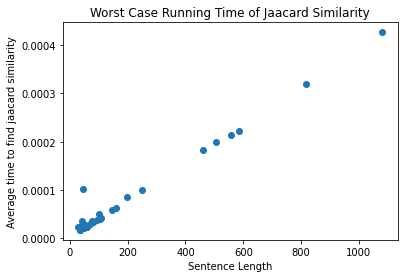

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(xx,yy)

plt.xlabel("Sentence Length")
plt.ylabel("Average time to find jaacard similarity")
plt.title("Worst Case Running Time of Jaacard Similarity")
plt.show()

The plot shows a fairly linear function with a few outliers. To get the complexity and the value for the constant we should plot the log of the function. 

However, jaccard with the boolean representation is quadratic. So let us try and find whether n is 1 or 2. The complexity follows this pattern
$y=c_a.x^n$, so if we plot a graph of $\log(y)$ against $\log(x)$ the gradient will be $\alpha$ and the y intercept will be $\log(c_a)$


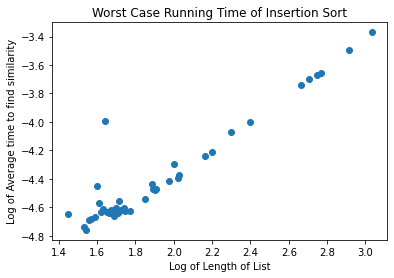

In [112]:
logxs=[np.log10(x) for x in xx]
logys=[np.log10(y) for y in yy]

plt.scatter(logxs,logys)
plt.xlabel("Log of Length of List")
plt.ylabel("Log of Average time to find similarity")
plt.title("Worst Case Running Time of Insertion Sort")
plt.show()

The plot shows that the slope is almost 1, and the y-intercept is around -5, the constant is $10^{-5}$ 
Taking a look at the jaccSim function we find 2 loops, so this gives us the idea that the run time should be quadratic. However, the second loop is an if statement and most of the time we dont enter it. 

Let's derive the slope and intercept using the linear regression function from scipy

In [113]:
import scipy.stats as stats
slope, intercept, r_value, p_value, std_err = stats.linregress(logxs, logys)
print("Slope is {} and intercept is {}".format(slope,intercept))

Slope is 0.8414916647748005 and intercept is -6.0053763488041


We will use the big O notation to empirically state the time complexity. The O notation asymptotically bounds a function from above and below.
This shows that the time complexity is $O(n^{0.84})$ and the constant is $10^{-6}$



But what does this constant show? The constant is the time it takes to run the lines of code outside the loops that does not depend on the size of the input bags. 

Now we will plot the over the mean time instead of the maximum time and check if the outliers are dealt with.

### Plotting the MEAN time

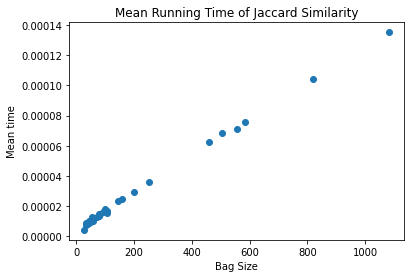

In [24]:
%matplotlib inline
plt.scatter(xx,ym)
#plt.ylim(0,0.002)
plt.xlabel("Bag Size")
plt.ylabel("Mean time")
plt.title("Mean Running Time of Jaccard Similarity")
plt.show()

Now the plot shows a better fit. 

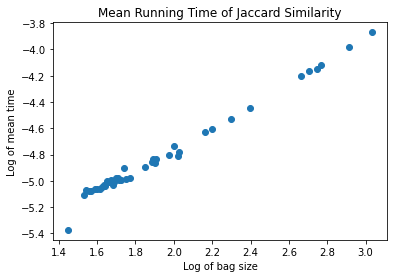

In [25]:
logxs=[np.log10(x) for x in xx]
logys=[np.log10(y) for y in ym]

plt.scatter(logxs,logys)
#plt.ylim(-6,-3)
plt.xlabel("Log of bag size")
plt.ylabel("Log of mean time")
plt.title("Mean Running Time of Jaccard Similarity")
plt.show()

Followiong similar steps as before to get the slope and constant

In [26]:
slope, intercept, r_value, p_value, std_err = stats.linregress(logxs, logys)
print("Slope is {} and intercept is {}".format(slope,intercept))

Slope is 0.8216154829362133 and intercept is -6.396833530177851


Mean and max show almost the same results. The time complexity is $O(n^{0.8})$ and the constant is $10^{-6}$

There aren't any major differences, the graphs for the max time has a few outliers that do not follow the 'regular' pattern. At the end the slope of the line showed almost the same result, hence they lead to the same running time complexity.

The worst case running time for jaccard is when we compare a document to itself because we will have to enter the if loop n times. Hence it might be nˆ2

In [27]:
import timeit
%timeit jaccSim(bow[0],bow[1])

100000 loops, best of 3: 15.7 µs per loop


In [28]:
%timeit jaccSim(bow[6],bow[1])

The slowest run took 28.68 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 12.5 µs per loop


## Dense Representation
Its extremely time consuming to have a dimension for every V word in the english vocabulary. So i will have a dimension for every word in the the list of documents i have, 'sentences'. 

The following cell finds all the unique words in my sentences to represent the vocabulary.

In [29]:
#function to get the unique words in our sentences
def getVocab(documents):
  columns=[]
  for doc in documents:
    for token in doc.split():
      if token.lower() not in columns:
        columns.append(token.lower())
  return columns


In [30]:
#cols is the vocab
cols=getVocab(sentences)

In [31]:
cols[:15]

['the',
 'french',
 'are',
 'certainly',
 'misunderstood:',
 '—',
 'but',
 'whether',
 'fault',
 'is',
 'theirs,',
 'in',
 'not',
 'sufficiently',
 'explaining']

In [32]:
#dimensions
len(cols)

4856

The following function 'denseRepresent' takes the vocabulary and the list of documents and returns a list of dictionaries.

The representation is very similar to the sparse one but instead it will have frequency values of 0 if the word exists in at least one of the documents and not in the current document.

In [33]:
def denseRepresent(vocab, documents):
  #initialize the list that will hold all the dictionary representations for the documents
  reps=[]
  #loop through each document in the input list of documents
  for doc in documents:
    #initialize an empty dictionary to store the key value pairs of the word and the frequency
    tempDict={}
    #loop through each word in the vocabulary
    for v in vocab:
      #assign the current word key to the value 0 
      tempDict[v]=0

      #check if the current word is in the current document
      if v in doc.split():
        #update the frequency value in the dictionary 
        tempDict[v]=tempDict[v]+1
    
    #append the list with our dictionary representation
    reps.append(tempDict)
  return reps



In [34]:
dense=denseRepresent(cols, sentences)

In [35]:
#dataframe for cisualization we have 101 rows representing our documents
#and 4703 columns representing the vocabulary
#the values are the frequencies of each word in the document
import pandas as pd
pddf=pd.DataFrame([d.values() for d in dense], columns=cols)
pddf

,the,french,are,certainly,misunderstood:,—,but,whether,fault,is,"theirs,",in,not,sufficiently,explaining,"themselves,",or,speaking,with,that,exact,limitation,and,precision,which,one,would,expect,on,a,point,of,such,"importance,","which,","moreover,",so,likely,to,be,...,u,targetted,towards,universal,audience,included,production,designer,ted,haworth,newt,arnold,effects,sass,bedig,cinematographer,coquillon,budgetary,pratfalls,emerges,scathing,brutality,war,notwithstanding,obvious,prefer,incidentally,lots,pi,courageous,artistic,significant,merits,creative,camera,clever,symbolism,high-octane,guts,lanquish
0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,1,0,1,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
107,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
108,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,...,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
109,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **QUESTION 2**

---







The second similarity algorithm we will be looking at is the cosine similarity. This algorithm measures the similarity geometrically by finding the cosine of the angle between the 2 things we're inspecting. The more similar two documents are the smaller the angle between them.

Cosine of 2 documents is the ratio of the dot product of the 2 documents to the squareroot of the product of dot product of document1 with itself and document2 with itself.

## Cosine Similarity from Dense

In [36]:
#cosine similarity using python built in dot product function
def cosSimDot(doc1,doc2):
  d1d2=np.dot(doc1,doc2)
  d1d1=np.dot(doc1,doc1)
  d2d2=np.dot(doc2,doc2)
  return d1d2/(math.sqrt(d1d1*d2d2))

In [37]:
#the documents should be represented as a list of frequency values
d1=[v for v in dense[0].values()]
d2=[v for v in dense[1].values()]
cosSimDot(d1,d2)

0.2450715406979359

In [38]:
#cosine similarity calculated dot product on my own
import math
def cosSim(doc1,doc2):
  #initialize 3 variables for our dot product
  d1d2=0
  d1d1=0
  d2d2=0

  #for each dimension update the dot products
  for i in range(0,len(doc1)):
    d1d2+=doc1[i]*doc2[i]
    d1d1+=doc1[i]*doc1[i]
    d2d2+=doc2[i]*doc2[i]
  return d1d2/(math.sqrt(d1d1*d2d2))

In [39]:
#represent the documents as a list of frequency values
d1=[v for v in dense[0].values()]
d2=[v for v in dense[1].values()]
cosSim(d1,d2)

0.2450715406979359

both cosine similarity functions yield the same results when tested on the first 2 documents

the following cell calculates the mean time over 20 repeats for each pair of documents using cosine similarity and the dense representation of the documents

cosine similarity function with my implementation of the dot product

In [40]:
timeCosSim={}
for b in range(0,len(dense)):
    for c in range(0,len(dense)):
        d1=[v for v in dense[b].values()]
        d2=[v for v in dense[c].values()]
        (ans,mean,error)=timetime(cosSim,d1,d2,repeats=20)
        timeCosSim[sum(d1)]= timeCosSim.get(sum(d1),[])
        timeCosSim[sum(d1)].append(mean)

In [41]:
xx=[]
yy=[]
for k in timeCosSim.keys():
  xx.append(k)
  yy.append(np.mean(timeCosSim[k]))

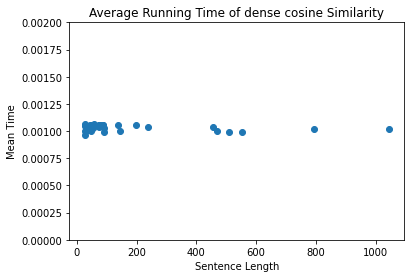

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(xx,yy)
plt.ylim(0,0.002)
plt.xlabel("Sentence Length")
plt.ylabel("Mean Time")
plt.title("Average Running Time of dense cosine Similarity")
plt.show()

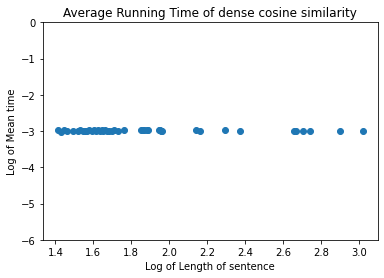

In [43]:
logxs=[np.log10(x) for x in xx]
logys=[np.log10(y) for y in yy]

plt.scatter(logxs,logys)
plt.ylim(-6,0)
plt.xlabel("Log of Length of sentence")
plt.ylabel("Log of Mean time")
plt.title("Average Running Time of dense cosine similarity")
plt.show()

the following cell calculates the mean time over 20 repeats for each pair of documents using cosine similarity and the dense representation of the documents

cosine similarity function with pythons built in dot product

In [44]:
timeCosSimDot={}
for b in range(0,len(dense)):
    for c in range(0,len(dense)):
        d1=[v for v in dense[b].values()]
        d2=[v for v in dense[c].values()]
        (ans,mean,error)=timetime(cosSimDot,d1,d2,repeats=20)
        timeCosSimDot[sum(d1)]= timeCosSimDot.get(sum(d1),[])
        timeCosSimDot[sum(d1)].append(mean)
        

In [45]:
xx=[]
yy=[]
for k in timeCosSimDot.keys():
  xx.append(k)
  yy.append(np.mean(timeCosSimDot[k]))

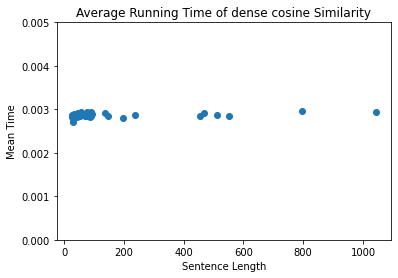

In [46]:
%matplotlib inline
plt.scatter(xx,yy)
plt.ylim(0,0.005)
plt.xlabel("Sentence Length")
plt.ylabel("Mean Time")
plt.title("Average Running Time of dense cosine Similarity")
plt.show()

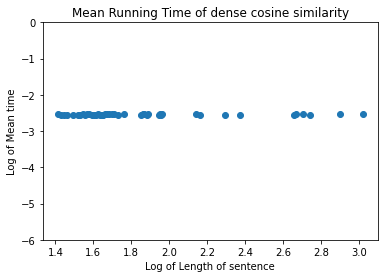

In [47]:
logxs=[np.log10(x) for x in xx]
logys=[np.log10(y) for y in yy]

plt.scatter(logxs,logys)
plt.ylim(-6,0)
plt.xlabel("Log of Length of sentence")
plt.ylabel("Log of Mean time")
plt.title("Mean Running Time of dense cosine similarity")
plt.show()

With the dense representation the running time is constant for each document. Thats because they all have the same dimension size, and the algorithm loops through each dimension regardless of its value. The length of the input sentence does not effect the algorithm whatsoever. 

The function that uses pythons dot product is slightly slower than the function that uses the dot product I implemented.

# **QUESTION 3**


---



## Cosine similarity from sparse

if 2 documents have no words in commmon it will yield to 0 in the denominator which is undefined and will cause errors, for this reason i added an if statment that checks if the dot product of the second document with itself is 0, if it is the function will return 0 as the 2 documents will be completely different.

In [49]:
def cosSimUpdated(doc1,doc2):
  d1d2=0
  d1d1=0
  d2d2=0
  for token in doc1.keys():
    d1d2+=doc1[token]*doc2.get(token,0)
    d1d1+=doc1[token]*doc1[token]
    d2d2+=doc2.get(token,0)*doc2.get(token,0)
  if d1d1==0 or d2d2==0:
    return 0
  else:
    return d1d2/(math.sqrt(d1d1*d2d2))

In [50]:
cosSimUpdated(bow[0],bow[1])

0.4177132891838501

comparing this measure to the previous one with the dense representation, i noticed that the sparse reoresentation gave the first 2 documents a higher similarity score. The reason could be that the dense representation has more 'features' so each word occurrence has less weight to the overall contribution of the similarity score. 



the following cell calculates the mean time over 20 repeats for each pair of documents using cosine similarity and the sparse representation of the documents


In [51]:
timePCosSim={}
for b in bow:
    for c in bow:
        (ans,mean,error)=timetime(cosSimUpdated,b,c,repeats=20)
        
        timePCosSim[len(b)]= timePCosSim.get(len(b),[])
        timePCosSim[len(b)].append(mean)

In [52]:
xx=[]
yy=[]
for k in timePCosSim.keys():
  xx.append(k)
  yy.append(np.mean(timePCosSim[k]))

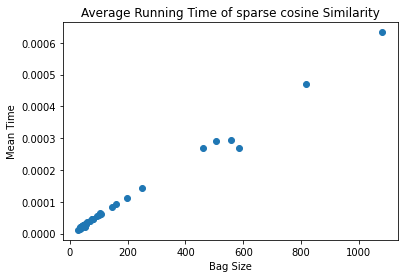

In [53]:
%matplotlib inline
plt.scatter(xx,yy)
#plt.ylim(0,0.002)
plt.xlabel("Bag Size")
plt.ylabel("Mean Time")
plt.title("Average Running Time of sparse cosine Similarity")
plt.show()

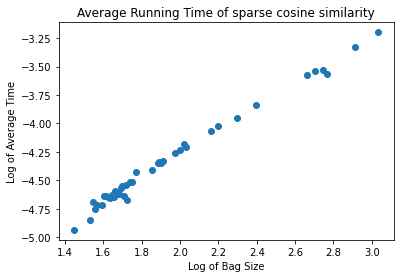

In [54]:
logxs=[np.log10(x) for x in xx]
logys=[np.log10(y) for y in yy]

plt.scatter(logxs,logys)

plt.xlabel("Log of Bag Size")
plt.ylabel("Log of Average Time")
plt.title("Average Running Time of sparse cosine similarity")
plt.show()

The scatter plot shows a linear relation, again lets calculate the slope and the intercept to make sure

In [55]:
slope, intercept, r_value, p_value, std_err = stats.linregress(logxs, logys)
print("Slope is {} and intercept is {}".format(slope,intercept))

Slope is 1.0349801421079918 and intercept is -6.33474241153136


Linear time complexity, O(n): the length of the time depends linearly on the size of the input bag. Cosine similarity has only one loop so this explains the linear time complexity. The constant again is a measure of the time taken to run the fixed code outside the for loop, this is not dependent on the size of the input. 

However, the overall time taken taken is slower than jaccard similarity, the reason for this is the computations done inside the for loop itself, dot product calculations are more complex than the simple addition operations. Yes the jaccard similarity has nested loops but the computations inside the loops dont take much time. 

# **QUESTION 4**

---



## All pair Similarity 

In [56]:
def allPairSim(bowdocs, simmeas='jaccard'):
  #initialize a dictionary that stores all pair similarity measures
  #the outermost key is the index of the first document and the inner keys are the indices of the 2nd documents
  #the values are the similairty measures
  simdict={}

  #loop through each bag, i is the first document
  for i in range(0,len(bowdocs)):
    #initialize an empty dictionary that will store the keys(indices) and the values (corresponding similarities)
    simdict[i]={}
    #loop through each bag, j is the second document
    for j in range(0,len(bowdocs)):
      #use the specified similarity measure
      if simmeas=='jaccard':
        simdict[i][j]=jaccSim(bowdocs[i],bowdocs[j])
      elif simmeas=='cosine':
        simdict[i][j]= cosSimUpdated(bowdocs[i],bowdocs[j])
  return simdict
  

In [57]:
allDictJacc=allPairSim(bow,'jaccard')

In [58]:
allDictJacc

{0: {0: 1.0,
  1: 0.11842105263157894,
  2: 0.09424083769633508,
  3: 0.10215053763440861,
  4: 0.05853658536585366,
  5: 0.11855670103092783,
  6: 0.0845771144278607,
  7: 0.07804878048780488,
  8: 0.08888888888888889,
  9: 0.061224489795918366,
  10: 0.16104868913857678,
  11: 0.09846153846153846,
  12: 0.08072916666666667,
  13: 0.08669354838709678,
  14: 0.03286770747740345,
  15: 0.03932584269662921,
  16: 0.041759880686055184,
  17: 0.03544450900639163,
  18: 0.026830203142966653,
  19: 0.028130671506352088,
  20: 0.024930747922437674,
  21: 0.09933774834437085,
  22: 0.07947019867549669,
  23: 0.09740259740259741,
  24: 0.10204081632653061,
  25: 0.056962025316455694,
  26: 0.056962025316455694,
  27: 0.11333333333333333,
  28: 0.09032258064516129,
  29: 0.0967741935483871,
  30: 0.1032258064516129,
  31: 0.10666666666666667,
  32: 0.1095890410958904,
  33: 0.07333333333333333,
  34: 0.08108108108108109,
  35: 0.059602649006622516,
  36: 0.08,
  37: 0.10493827160493827,
  38: 0.

In [59]:
#dataframe for visualization
pd.DataFrame(allDictJacc)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110
0,1.000000,0.118421,0.094241,0.102151,0.058537,0.118557,0.084577,0.078049,0.088889,0.061224,0.161049,0.098462,0.080729,0.086694,0.032868,0.039326,0.041760,0.035445,0.026830,0.028131,0.024931,0.099338,0.079470,0.097403,0.102041,0.056962,0.056962,0.113333,0.090323,0.096774,0.103226,0.106667,0.109589,0.073333,0.081081,0.059603,0.080000,0.104938,0.091503,0.093333,...,0.032051,0.142857,0.073333,0.046512,0.114865,0.104294,0.095890,0.095890,0.093333,0.057325,0.072848,0.058824,0.066667,0.084967,0.108280,0.102041,0.096154,0.089172,0.063694,0.050955,0.109677,0.072368,0.071895,0.051948,0.106667,0.106918,0.079470,0.073333,0.126667,0.059524,0.070513,0.108844,0.072368,0.073333,0.094595,0.045161,0.031250,0.069182,0.065789,0.072848
1,0.118421,1.000000,0.134884,0.126761,0.130045,0.150685,0.119469,0.103448,0.157025,0.121673,0.150000,0.126437,0.139241,0.099617,0.047851,0.053883,0.049853,0.038286,0.031547,0.031839,0.045884,0.098361,0.081967,0.114754,0.082418,0.080214,0.068783,0.122222,0.108696,0.114130,0.125683,0.052356,0.070652,0.071038,0.065574,0.065574,0.082418,0.108808,0.080214,0.081522,...,0.015544,0.127778,0.088889,0.064356,0.075269,0.102564,0.095506,0.083333,0.081522,0.057895,0.064865,0.047872,0.077348,0.080645,0.094241,0.088398,0.084211,0.051020,0.057592,0.041667,0.078125,0.076087,0.069892,0.059140,0.080645,0.093264,0.076087,0.059459,0.085106,0.049261,0.057592,0.087912,0.064516,0.076923,0.076503,0.059140,0.020408,0.078947,0.064865,0.064865
2,0.094241,0.134884,1.000000,0.127907,0.107527,0.163842,0.112903,0.105263,0.135922,0.111607,0.141221,0.112540,0.100817,0.075356,0.036606,0.033816,0.035101,0.026072,0.022222,0.023140,0.034043,0.091549,0.093525,0.097222,0.063380,0.083333,0.061224,0.114286,0.104895,0.096552,0.081081,0.033333,0.078571,0.041667,0.056738,0.064286,0.094203,0.105263,0.075862,0.085106,...,0.034483,0.075342,0.094891,0.090323,0.100000,0.069620,0.071942,0.120301,0.085106,0.076389,0.094203,0.055944,0.064286,0.076389,0.108844,0.078571,0.081081,0.052632,0.054054,0.062069,0.066225,0.085714,0.047945,0.048611,0.083916,0.071429,0.070423,0.086957,0.060403,0.056962,0.061224,0.078014,0.070423,0.056338,0.070922,0.048611,0.019868,0.089041,0.070922,0.063380
3,0.102151,0.126761,0.127907,1.000000,0.080214,0.167630,0.109290,0.113514,0.116505,0.103604,0.117424,0.128713,0.120448,0.091667,0.036728,0.038118,0.035206,0.028522,0.023041,0.024113,0.029830,0.070922,0.064748,0.040541,0.072993,0.093525,0.070423,0.093525,0.076923,0.107143,0.068493,0.041379,0.072993,0.057971,0.082090,0.043165,0.057554,0.086093,0.093525,0.095588,...,0.035461,0.100719,0.065693,0.085526,0.102941,0.057692,0.058394,0.066176,0.064286,0.055944,0.057554,0.035211,0.058394,0.063380,0.104167,0.088889,0.075862,0.040000,0.070423,0.056338,0.097902,0.064748,0.056738,0.065217,0.078571,0.095238,0.064748,0.042857,0.092199,0.044872,0.027027,0.088235,0.042254,0.042857,0.080882,0.080882,0.034483,0.083916,0.088889,0.072993
4,0.058537,0.130045,0.107527,0.080214,1.000000,0.103093,0.119792,0.084577,0.152381,0.137168,0.088652,0.102804,0.104558,0.102881,0.038940,0.039421,0.038748,0.031903,0.021374,0.029104,0.057389,0.072368,0.059603,0.057325,0.060000,0.093333,0.037975,0.071895,0.114094,0.056962,0.070064,0.044872,0.074324,0.032680,0.039735,0.053691,0.060000,0.100000,0.051282,0.059211,...,0.012821,0.078431,0.046358,0.041176,0.072848,0.072727,0.060811,0.082759,0.059211,0.058442,0.060000,0.046053,0.060811,0.038217,0.068750,0.067114,0.070064,0.043478,0.064935,0.031847,0.056250,0.045752,0.032051,0.046053,0.038217,0.081250,0.052632,0.060403,0.044025,0.029412,0.025000,0.066667,0.038961,0.019355,0.067114,0.012739,0.018868,0.056962,0.052980,0.052980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [60]:
allDictCos=allPairSim(bow,'cosine')

In [61]:
#dataframe for visualization 
pd.DataFrame(allDictCos)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110
0,1.000000,0.569374,0.686790,0.533164,0.671201,0.569743,0.616496,0.530907,0.565160,0.549477,0.665401,0.563030,0.537511,0.518051,0.401385,0.586555,0.546376,0.546359,0.613791,0.487779,0.453671,0.467477,0.565704,0.516568,0.532524,0.549720,0.381599,0.595518,0.616728,0.490051,0.564799,0.527964,0.584705,0.507093,0.358569,0.417574,0.395348,0.686108,0.490034,0.673730,...,0.275661,0.643587,0.473568,0.445377,0.483381,0.628281,0.688435,0.496942,0.488204,0.410391,0.591520,0.364973,0.505283,0.426996,0.497391,0.476499,0.566722,0.438250,0.475466,0.295722,0.535264,0.464758,0.431291,0.341993,0.470516,0.518558,0.525026,0.598243,0.628605,0.496592,0.403180,0.506022,0.476869,0.516637,0.496929,0.440386,0.239457,0.368538,0.399406,0.384371
1,0.417713,1.000000,0.693824,0.584700,0.833112,0.638104,0.727345,0.623754,0.769729,0.792468,0.623615,0.588410,0.757776,0.763828,0.763254,0.811728,0.785890,0.750466,0.782403,0.832812,0.478653,0.516500,0.537101,0.590426,0.362656,0.618932,0.282040,0.615748,0.754750,0.535227,0.599588,0.293723,0.368696,0.387943,0.244421,0.395555,0.397811,0.693103,0.540222,0.604695,...,0.123239,0.670303,0.442535,0.491480,0.440704,0.543220,0.601190,0.508233,0.417905,0.436931,0.560093,0.403165,0.526861,0.402377,0.523198,0.500190,0.588175,0.336637,0.450193,0.275264,0.558088,0.417965,0.399418,0.274433,0.368061,0.522868,0.663933,0.608030,0.338432,0.226132,0.345193,0.596696,0.400867,0.460217,0.428047,0.573070,0.161742,0.308158,0.315584,0.328103
2,0.365495,0.691206,1.000000,0.673221,0.705214,0.666570,0.744933,0.580846,0.746987,0.808305,0.568230,0.597999,0.730732,0.834669,0.692163,0.765010,0.653350,0.564351,0.749602,0.764657,0.631321,0.444660,0.557152,0.457473,0.315740,0.528926,0.324780,0.530817,0.676716,0.482158,0.470871,0.211185,0.366016,0.340459,0.284004,0.315899,0.399275,0.547288,0.535595,0.500089,...,0.217303,0.480592,0.502331,0.492442,0.517322,0.423790,0.438470,0.545783,0.405046,0.418330,0.588236,0.380892,0.457213,0.392483,0.560220,0.470882,0.585429,0.310058,0.431186,0.310878,0.501486,0.426006,0.352148,0.237322,0.424264,0.455808,0.548400,0.607355,0.328139,0.259043,0.330925,0.551724,0.400031,0.369994,0.422427,0.545455,0.149901,0.410034,0.416357,0.292822
3,0.351016,0.518030,0.648476,1.000000,0.505829,0.527391,0.600262,0.618014,0.611571,0.619897,0.503852,0.594286,0.667232,0.707482,0.555565,0.617642,0.540201,0.387583,0.638002,0.626320,0.599939,0.365720,0.444462,0.278207,0.331002,0.483707,0.421200,0.496458,0.624366,0.499760,0.332146,0.231073,0.398705,0.378077,0.342160,0.258341,0.309141,0.435365,0.545746,0.442777,...,0.359856,0.428174,0.505621,0.496180,0.443158,0.377964,0.360603,0.397223,0.345709,0.379158,0.494872,0.256664,0.428746,0.418214,0.570215,0.460615,0.470024,0.262194,0.431455,0.330456,0.432055,0.458049,0.315335,0.279372,0.367799,0.459509,0.501599,0.508183,0.424000,0.292974,0.242511,0.407544,0.266907,0.327983,0.477760,0.619560,0.213000,0.463030,0.465669,0.330759
4,0.325407,0.712643,0.613758,0.410985,1.000000,0.530740,0.748015,0.529622,0.726546,0.787688,0.523889,0.515688,0.663975,0.752774,0.720322,0.786818,0.859430,0.543110,0.777222,0.825592,0.429117,0.469370,0.507655,0.356650,0.349983,0.599936,0.188154,0.520343,0.741391,0.358900,0.449619,0.276604,0.332663,0.213504,0.190081,0.329818,0.245961,0.650216,0.487841,0.531107,...,0.089653,0.532670,0.211925,0.397258,0.391059,0.387879,0.440534,0.478402,0.355293,0.464710,0.527762,0.345410,0.423529,0.273283,0.435459,0.441226,0.565918,0.280263,0.441562,0.220113,0.509793,0.241937,0.276758,0.246234,0.255518,0.499115,0.609972,0.592940,0.217732,0.148686,0.148832,0.495776,0.287188,0.232041,0.328571,0.154418,0.137014,0.219173,0.278878,0.313064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

As before we will use the 'timetime' function, calculate the time taken for different sample sizes to see how the time increases with the increasing sample size.

In [115]:
#initialize a dictionary that will store the mean time over 20 runs for each sample size
timeAllPairs={}
for x in range(10,100,10):
  (ans,mean,error)=timetime(allPairSim,sample(bow,x),'cosine',repeats=20)
  timeAllPairs[x]=mean

In [116]:
timeAllPairs

{10: 0.0033089637756347655,
 20: 0.013206386566162109,
 30: 0.06314568519592285,
 40: 0.07720619440078735,
 50: 0.09503027200698852,
 60: 0.16970424652099608,
 70: 0.26927589178085326,
 80: 0.31580222845077516,
 90: 0.456401002407074}

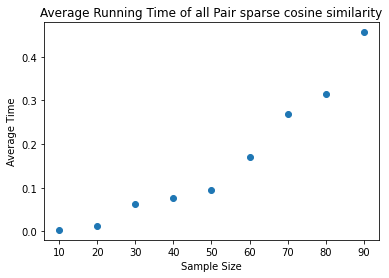

In [117]:
#scatter the results

plt.scatter(timeAllPairs.keys(),timeAllPairs.values())
plt.xlabel("Sample Size")
plt.ylabel("Average Time")
plt.title("Average Running Time of all Pair sparse cosine similarity")
plt.show()

In [118]:
#double the documents size by adding each document twice
moresents=sentences+sentences

In [119]:
#get the sparse representation for the doubled documents
bow2=sparseRep(moresents)
#again get the mean time but this time over 10 runs for each sample size
timeAllPairs={}
for x in range(10,200,10):
  (ans,mean,error)=timetime(allPairSim,sample(bow2,x),'cosine',repeats=10)
  timeAllPairs[x]=mean

In [120]:
timeAllPairs

{10: 0.003995871543884278,
 20: 0.016912841796875,
 30: 0.06628620624542236,
 40: 0.06770040988922119,
 50: 0.11472010612487793,
 60: 0.15467867851257325,
 70: 0.23144426345825195,
 80: 0.31549184322357177,
 90: 0.42894394397735597,
 100: 0.5975958824157714,
 110: 0.6342980623245239,
 120: 0.7778311729431152,
 130: 0.807525634765625,
 140: 0.9155252933502197,
 150: 1.1933955192565917,
 160: 1.3605698108673097,
 170: 1.2945494174957275,
 180: 1.6189119815826416,
 190: 1.8305245161056518}

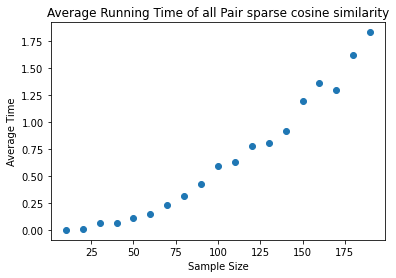

In [121]:
#scatter plot the results
plt.scatter(timeAllPairs.keys(),timeAllPairs.values())
plt.xlabel("Sample Size")
plt.ylabel("Average Time")
plt.title("Average Running Time of all Pair sparse cosine similarity")
plt.show()

As before get the log plot to estimate the slope and y-intercept(constant)

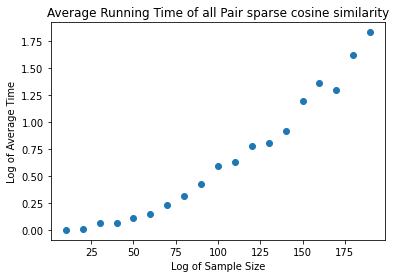

In [122]:
xx=[np.log10(k) for k in timeAllPairs.keys()]
yy=[np.log10(v) for v in timeAllPairs.values()]
plt.scatter(timeAllPairs.keys(),timeAllPairs.values())
plt.xlabel("Log of Sample Size")
plt.ylabel("Log of Average Time")
plt.title("Average Running Time of all Pair sparse cosine similarity")
plt.show()

In [123]:

slope, intercept, r_value, p_value, std_err = stats.linregress(xx,yy)
print("Slope is {} and intercept is {}".format(slope,intercept))

Slope is 2.0481455796831805 and intercept is -4.397260196829706


quadratic time complexity, The time complexity is $O(n^{2})$ and the constant is $10^{-4.4}$

Estimating for 2000 documents the time taken to calculate all pair cosine similarity

In [124]:
x=190
t=timeAllPairs[190]
while x<2000:
  t=t*2
  x=x+10
t


5.610541316755201e+54

In [125]:
bow2=sparseRep(moresents)
timeAllPairsJ={}
for x in range(10,200,10):
  (ans,mean,error)=timetime(allPairSim,sample(bow2,x),'jaccard',repeats=10)
  timeAllPairsJ[x]=mean

In [126]:
timeAllPairsJ

{10: 0.002867436408996582,
 20: 0.005691170692443848,
 30: 0.013093161582946777,
 40: 0.029413890838623048,
 50: 0.035521626472473145,
 60: 0.056941676139831546,
 70: 0.06883406639099121,
 80: 0.08115212917327881,
 90: 0.11087474822998047,
 100: 0.15673580169677734,
 110: 0.20460870265960693,
 120: 0.20964622497558594,
 130: 0.22362346649169923,
 140: 0.3034773349761963,
 150: 0.32723724842071533,
 160: 0.40635344982147215,
 170: 0.47150225639343263,
 180: 0.4958033561706543,
 190: 0.5427169561386108}

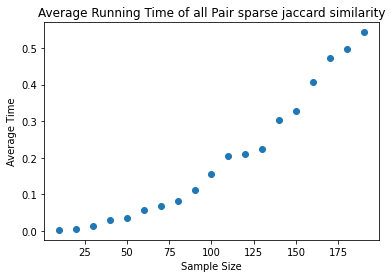

In [127]:
plt.scatter(timeAllPairsJ.keys(),timeAllPairsJ.values())
plt.xlabel("Sample Size")
plt.ylabel("Average Time")
plt.title("Average Running Time of all Pair sparse jaccard similarity")
plt.show()

In [128]:
xx=[np.log10(k) for k in timeAllPairsJ.keys()]
yy=[np.log10(v) for v in timeAllPairsJ.values()]
slope, intercept, r_value, p_value, std_err = stats.linregress(xx,yy)
print("Slope is {} and intercept is {}".format(slope,intercept))

Slope is 1.8911567702171816 and intercept is -4.603161220939717


Again quadratic complexity. The time complexity is $O(n^{1.9})$ and the constant is $10^{-4.8}$

The jaccard similarity is slightly less complex than cosine similarity.

Estimating for 2000 documents the time taken to calculate all pair jaccard similarity

In [129]:
x=190
t=timeAllPairsJ[190]
while x<2000:
  t=t*2
  x=x+10
t

1.6634226304694585e+54

Last check to prove that jaccard is faster although both measures have the same time complexity

In [130]:
st= time.time()
allPairSim(bow,'cosine')
ft= time.time()
ft-st

0.651090145111084

In [131]:
st=time.time()
allPairSim(bow,'jaccard')
ft= time.time()
ft-st

0.16935324668884277

# **QUESTION 5**


---


MapReduce is a computer paradigm for speeding up algorithms, It includes 2 functions Map() and Reduce(). The Map() function turns the input chunk into a sequence of key-value pairs, but its not a regular dictionary because the keys dont have to be unique. 
The Reduce() function sums the values with the same key. 



In [79]:
import multiprocessing

multiprocessing.cpu_count()

2

We can reduce the running time complexity of the all pair similarity function by only computing the similarity of the document pairs that have at least one word in common. Finding those pairs could be done using MapReduce. 

We can also use mapReduce to calculate the dot products of all pair of documents like in the matrix matrix map reduce function

In [80]:
postings={}
for i in range(0,len(dense)):
  for k in dense[i].keys():
    if dense[i][k]!=0:
      postings[k]= postings.get(k,[])
      postings[k].append((i,dense[i][k]))

In [84]:
reduced=[]
for k in postings.keys():
  curr=postings[k]
  for d in curr:
    for v in curr:
      if d!=v:
        reduced.append(((d[0],v[0]),max(d[1],v[1])))


In [ ]:
def map_reduceAllPairs(docs, mapper,reducer):
  collector=defaultdict(list)
  rows=len(docs)
  cols=len(docs)
  

  for row in range(0,rows):
    for k in docs[i].keys():
      if docs[row,k]!=0:
        for key,value in mapper(row,k):
          collector[key].append(value)

  outputs=[]
  for key,values in collector.items():
    for res in reducer(key,values):
      outputs.append(res)
  return outputs

In [ ]:
def mv_mapper(row,col):
    yield(i,dense[i][k])
        
def mv_reducer(row,counts):
    yield(row,sum(counts))

# CONCLUSION


---


*   Overall jaccard is slightly faster than cosine similarity.
*   The sparse representation is so much more efficient than the dense representation. 


*   Jaccard Similarity using Sparse Representation: O($n^{0.84}$), and the constant is $10^{-6}$

y= $10^{-6}$
. $x^{0.84}$





*   Cosine Similarity using Sparse Representation: O(n), and the constant is $10^{-6}$

y= $10^{-6}$
. $x$
*   Cosine Similarity using Dense Representation: Constant time O(1)
*   All Pair Jaccard Similarity using Sparse Representation: O($n^{1.9}$), and the constant is $10^{-4.4}$

y= $10^{-4.4}$
. $x^{1.9}$
*   All Pair Cosine Similarity using Sparse Representation: O($n^{2}$), and the constant is $10^{-4.8}$

y= $10^{-4.8}$
. $x^{2}$







Improvements:


*   We can further improve our algorithms by performing some preprocessing on our documents (such as lemmatization, stopword remover, stemming etc)






In the following cells i will apply some preprocessing to the text and follow the same tests to derive the time complexity. I will test it only on the sparse data.

### Preprocessing

In [390]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('wordnet_ic')
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
wl = WordNetLemmatizer() 
#function to preprocess the documents
def normalizeSent(sentences):
  #apply case normalization
  lowered=[w.lower() for w in sentences]
  #remove stopwords and number from the text
  filtered_tokens = [w for w in lowered if w.isalpha() and not w.isdigit() and w not in stop]
  #lemmatize all the tokens in the text
  lemmtokens=[wl.lemmatize(word) for word in filtered_tokens]
  #return the preprocessed sentences as a list of tokens/words
  return lemmtokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package wordnet_ic to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet_ic.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [393]:
filteredSentence=[normalizeSent(s.split()) for s in sentences]

In [396]:
def sparseRep2(docs):
  #initialize an empty list that will store a list of dictionaries
  #each dictionary in the list is a bag of words representation for a document/sentence
  bowList=[]
  #for each document/sentence in the list of documents
  for doc in docs:
    #initialize an empty dictionary to store the unique tokens in this current document as keys, 
    #and the corresponding number of occurrence as values
    tempDict={}

    #loop through each word/token in the current document
    for token in doc:
      #in the dictionary update the value with the token key by adding 1 for its occurrence
      #if key is not in the dictionary yet set its value to 0
      tempDict[token.lower()]=tempDict.get(token.lower(),0)+1
    
    #after we loop through the whole tokens in the document we append the dictionary to the list
    bowList.append(tempDict)
  return bowList

In [397]:
filteredbow=sparseRep2(filteredSentence)

### Cosine Similarity on Preprocessed text

In [399]:
timePCosSim={}
for b in filteredbow:
  if len(b)!=0:
    for c in filteredbow:
      if len(c)!=0:
        (ans,mean,error)=timetime(cosSimUpdated,b,c,repeats=20)
        timePCosSim[len(b)]= timePCosSim.get(len(b),[])
        timePCosSim[len(b)].append(mean)

In [400]:
xx=[]
yy=[]
for k in timePCosSim.keys():
  xx.append(k)
  yy.append(np.mean(timePCosSim[k]))

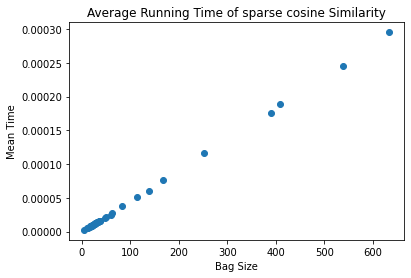

In [402]:
%matplotlib inline
plt.scatter(xx,yy)
#plt.ylim(0,0.002)
plt.xlabel("Bag Size")
plt.ylabel("Mean Time")
plt.title("Average Running Time of sparse cosine Similarity")
plt.show()

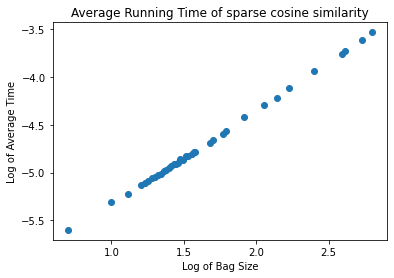

In [403]:
logxs=[np.log10(x) for x in xx]
logys=[np.log10(y) for y in yy]

plt.scatter(logxs,logys)
#plt.ylim(-6,-2)
plt.xlabel("Log of Bag Size")
plt.ylabel("Log of Average Time")
plt.title("Average Running Time of sparse cosine similarity")
plt.show()

In [404]:
slope, intercept, r_value, p_value, std_err = stats.linregress(logxs, logys)
print("Slope is {} and intercept is {}".format(slope,intercept))

Slope is 0.9955651161478593 and intercept is -6.3392585671562545


The scatter plot looks more linear, straight. The slope is almost 1, so the time complexity is O(n) and the constant is 10ˆ-6

### Jaccard Similarity on Preprocessed Text

In [405]:
#initialize a dictionary that will store for each SIZE of a bag all the mean times of finding
#jaccard similarity with all the other documents
timeJaccDict={}

#for each bag in our list
for b in filteredbow:
  #compare it with each bag in our list including itself
  for c in filteredbow:
    #get the mean time over 20 repeats for the current pair of documents
    (ans,mean,error)=timetime(jaccSim,b,c,repeats=20)
    #append the list of the key of the length of the bag (number of unique words in our sentence) 
    #with the mean time 'mean'
    timeJaccDict[len(b)]= timeJaccDict.get(len(b),[])
    timeJaccDict[len(b)].append(mean)

In [406]:
xx=[]
yy=[]
for k in timeJaccDict.keys():
  xx.append(k)
  yy.append(np.mean(timeJaccDict[k]))

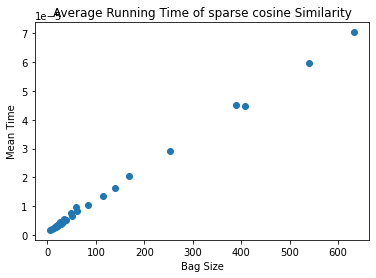

In [407]:
%matplotlib inline
plt.scatter(xx,yy)
#plt.ylim(0,0.002)
plt.xlabel("Bag Size")
plt.ylabel("Mean Time")
plt.title("Average Running Time of sparse cosine Similarity")
plt.show()

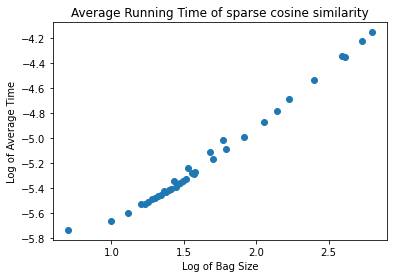

In [408]:
logxs=[np.log10(x) for x in xx]
logys=[np.log10(y) for y in yy]

plt.scatter(logxs,logys)

plt.xlabel("Log of Bag Size")
plt.ylabel("Log of Average Time")
plt.title("Average Running Time of sparse cosine similarity")
plt.show()

In [409]:
slope, intercept, r_value, p_value, std_err = stats.linregress(logxs, logys)
print("Slope is {} and intercept is {}".format(slope,intercept))

Slope is 0.8301746533101594 and intercept is -6.542694207730756


Time complexity is same as before $O(nˆ{0.8})$ and almost the same constant $10ˆ{-6.5}$

In [135]:
##This code will word count all of the markdown cells in the notebook saved at filepath
##Running it before providing any answers shows that the questions have a word count of 388

import io
from nbformat import current

filepath="/content/drive/My Drive/Colab Notebooks/AlgDSAssignment.ipynb"

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count))

Submission length is 1883
